In [ ]:
import pandas as pd
from scipy.spatial import KDTree
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle
from matplotlib import cm
from math import sin, cos, sqrt, atan2, radians
import matplotlib.dates as mdates
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.colors as mcolors
from statsmodels.tsa.stattools import adfuller




# define all helper functions for the data

# function to define the hurricane score
def wind_speed(distance, v_m, r_m):
    b = 2
    x = 0
    s = 0.5
   
    x = ((r_m/distance)**b)*np.exp(1-(r_m/distance)**b)

    return v_m*x**s

# def wind_speed(distance, v_m, r_m):
    # solve v_m*x**s = 17.5
    # x**s = 17.5 / v_m
    # slog(x) = log(17.5 / v_m)
    # s = log (17.5 / v_m) / log(x)
    r_175 = 1.5 * v_m / 0.5144
    b = 2
    x = 0
    s = 0
    r_n = 1.8 * v_m / 0.5144
    if (distance <= r_m):
        s = 0.5
    else:
        s_n = np.log(17.5 / v_m) / np.log(((r_m/r_175)**b)*np.exp(1-(r_m/r_175)**b))
        s = (distance - r_m)* (s_n-0.5)/(r_n-r_m)
    x = ((r_m/distance)**b)*np.exp(1-(r_m/distance)**b)

    return v_m*x**s


# function to calculate distance using lat, lon (distance in km)
def distance(loc1, loc2):
    # Approximate radius of earth in km
    R = 6373.0

    lat1 = radians(loc1[0])
    lon1 = radians(loc1[1])
    lat2 = radians(loc2[0])
    lon2 = radians(loc2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

# define set of functions to predict Rmax8
def calc_f(lat):
    return 2*.00007292*sin(radians(lat))

def calc_mratio(v_max, r_175, lat):
    return 0.699 * np.exp(-0.00618*(v_max - 17.5)-0.00210*(v_max - 17.5)*(1/2*calc_f(lat)*r_175))

def calc_m175(r_175, lat):
    return r_175 * 17.5 + 1/2 * calc_f(lat)*r_175**2

def calc_rmax(v_max, lat):
    r_175 = 1.8 * v_max / 0.5144
    # r_175 = 100*1.61 # distance converted from nautical miles to kilometers
    # r_175 = 500 # distance converted from nautical miles to kilometers

    
    return v_max/(calc_f(lat))*(sqrt(1+2*calc_f(lat)*(calc_m175(r_175, lat)*calc_mratio(v_max, r_175, lat))/(v_max**2))-1)


BD1: ['1', '7']
[1, 7]
[datetime.datetime(2017, 8, 17, 15, 0), datetime.datetime(2017, 8, 17, 21, 0), datetime.datetime(2017, 8, 18, 3, 0), datetime.datetime(2017, 8, 18, 9, 0), datetime.datetime(2017, 8, 18, 15, 0), datetime.datetime(2017, 8, 18, 21, 0), datetime.datetime(2017, 8, 19, 3, 0), datetime.datetime(2017, 8, 19, 9, 0), datetime.datetime(2017, 8, 19, 15, 0), datetime.datetime(2017, 8, 19, 21, 0), datetime.datetime(2017, 8, 20, 3, 0), datetime.datetime(2017, 8, 23, 15, 0), datetime.datetime(2017, 8, 23, 21, 0), datetime.datetime(2017, 8, 24, 3, 0), datetime.datetime(2017, 8, 24, 9, 0), datetime.datetime(2017, 8, 24, 15, 0), datetime.datetime(2017, 8, 24, 18, 0), datetime.datetime(2017, 8, 24, 21, 0), datetime.datetime(2017, 8, 25, 3, 0), datetime.datetime(2017, 8, 25, 9, 0), datetime.datetime(2017, 8, 25, 15, 0), datetime.datetime(2017, 8, 25, 21, 0), datetime.datetime(2017, 8, 26, 3, 0), datetime.datetime(2017, 8, 26, 9, 0), datetime.datetime(2017, 8, 26, 15, 0), datetime.dat

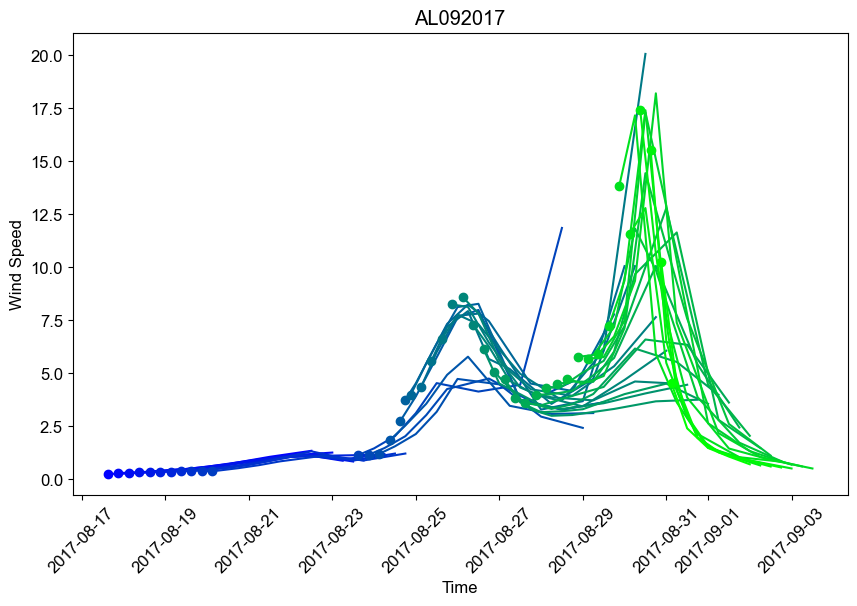

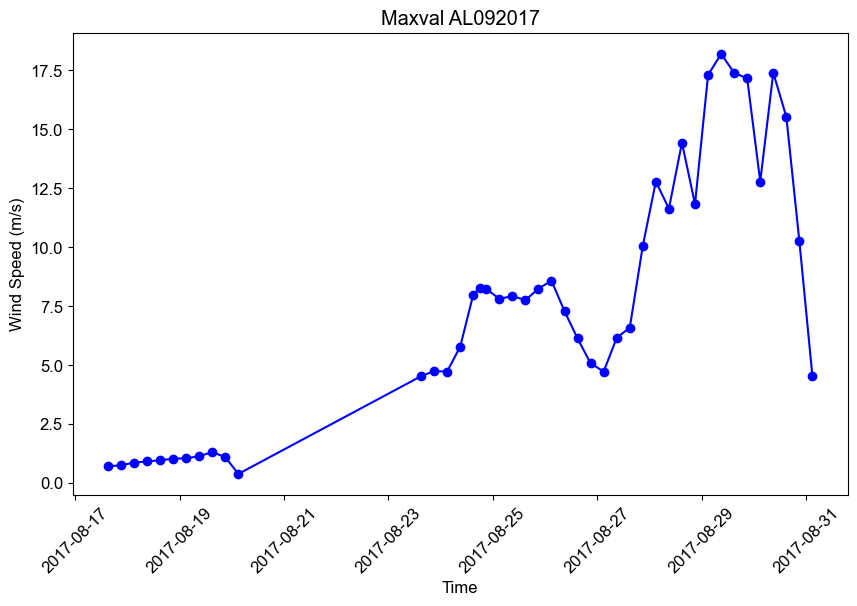

8
2017
2017-09-15 00:00:00


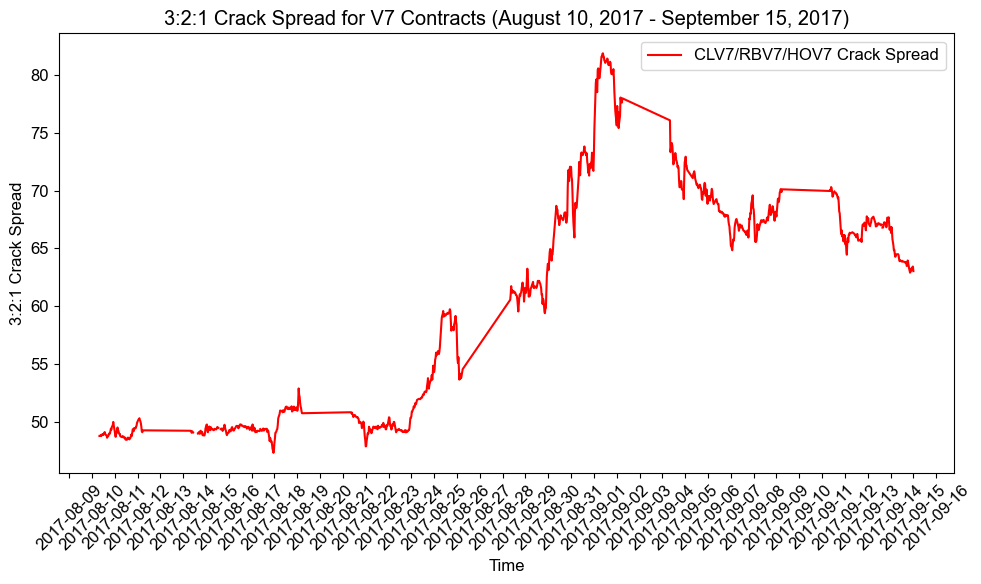

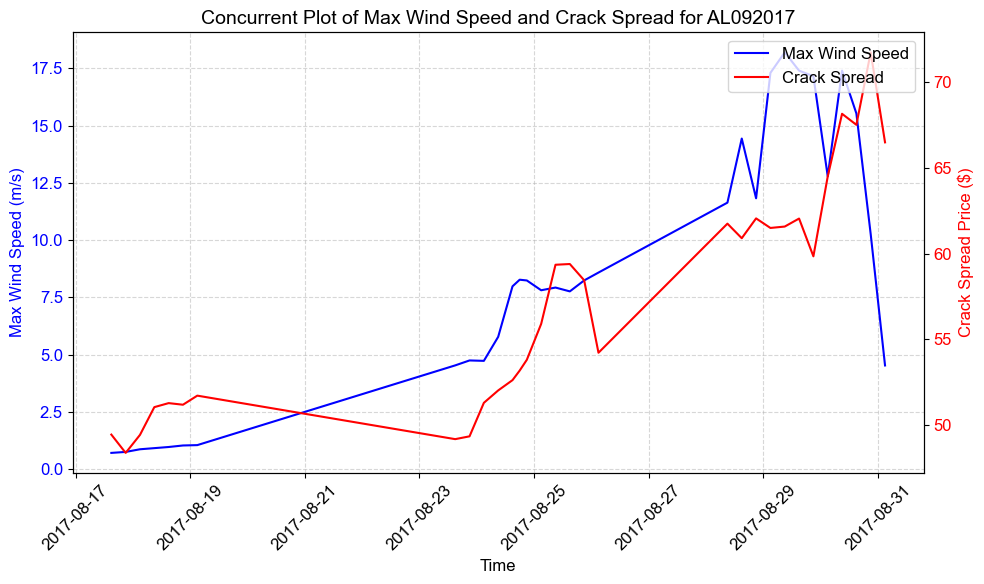

Phillips-Perron Test for AL092017 - Crack Spread Data
Test Statistic                 -3.875366
p-value                         0.013112
Lags Used                       0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -4.297095
Critical Value (5%)            -3.568557
Critical Value (10%)           -3.218427
dtype: float64
Lagrange multiplier statistic: 0.038406711809722216
p-value: 0.844628712858358
f-value: 0.03597342785672266
f p-value: 0.8508916946891603
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     54.49
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           3.92e-08
Time:                        17:44:23   Log-Likelihood:                -89.291
No. Obse

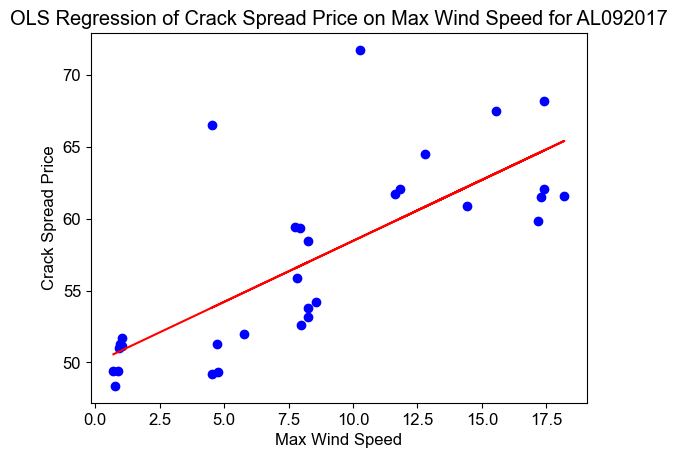

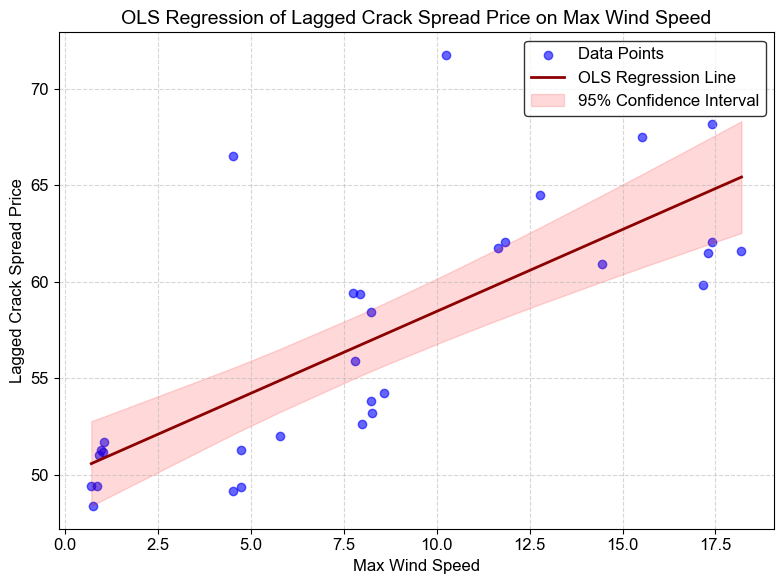

BD1: ['2', '0']
[2, 0]
[datetime.datetime(2020, 8, 20, 3, 0), datetime.datetime(2020, 8, 20, 9, 0), datetime.datetime(2020, 8, 20, 15, 0), datetime.datetime(2020, 8, 20, 21, 0), datetime.datetime(2020, 8, 21, 3, 0), datetime.datetime(2020, 8, 21, 9, 0), datetime.datetime(2020, 8, 21, 15, 0), datetime.datetime(2020, 8, 21, 21, 0), datetime.datetime(2020, 8, 22, 3, 0), datetime.datetime(2020, 8, 22, 9, 0), datetime.datetime(2020, 8, 22, 15, 0), datetime.datetime(2020, 8, 22, 21, 0), datetime.datetime(2020, 8, 23, 3, 0), datetime.datetime(2020, 8, 23, 9, 0), datetime.datetime(2020, 8, 23, 15, 0), datetime.datetime(2020, 8, 23, 21, 0), datetime.datetime(2020, 8, 24, 3, 0), datetime.datetime(2020, 8, 24, 9, 0), datetime.datetime(2020, 8, 24, 15, 0), datetime.datetime(2020, 8, 24, 21, 0), datetime.datetime(2020, 8, 25, 3, 0), datetime.datetime(2020, 8, 25, 9, 0), datetime.datetime(2020, 8, 25, 15, 0), datetime.datetime(2020, 8, 25, 21, 0), datetime.datetime(2020, 8, 26, 3, 0), datetime.datet

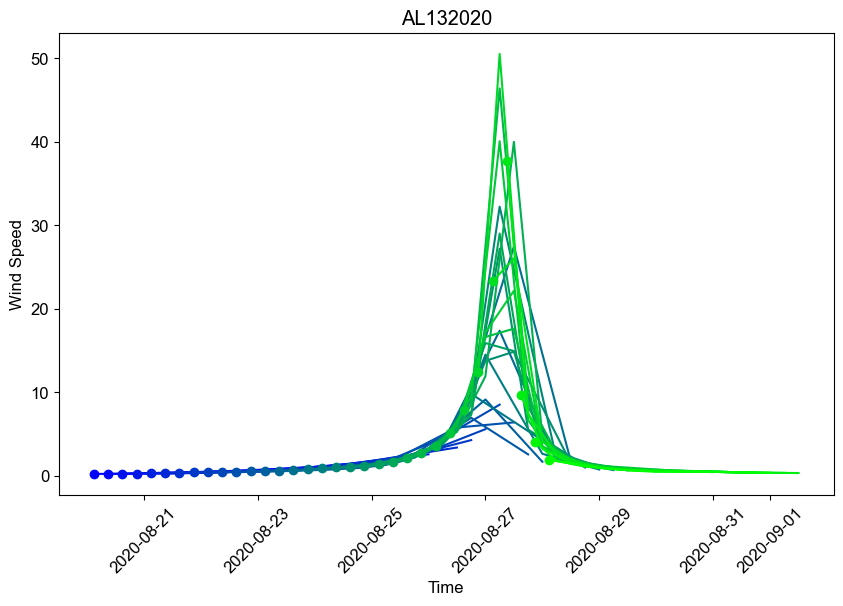

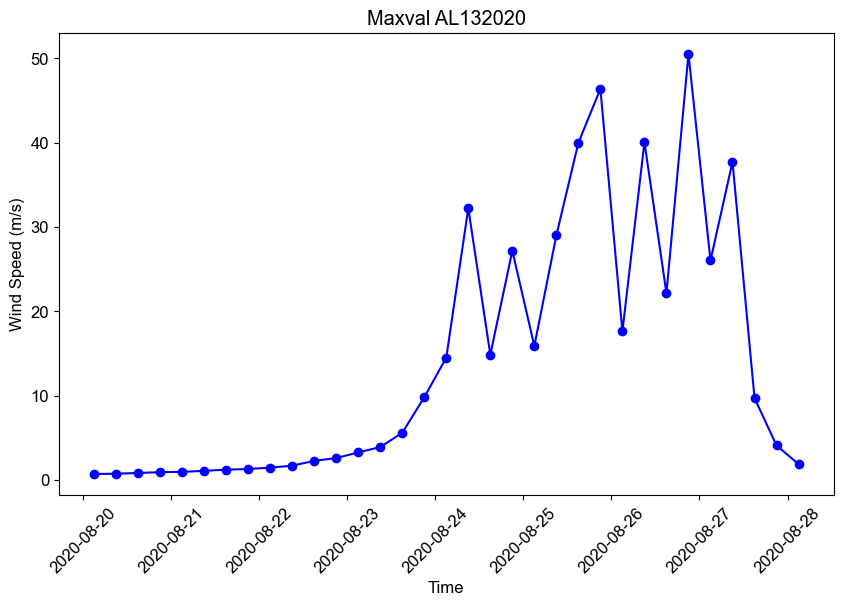

8
2020
2020-08-28 00:00:00


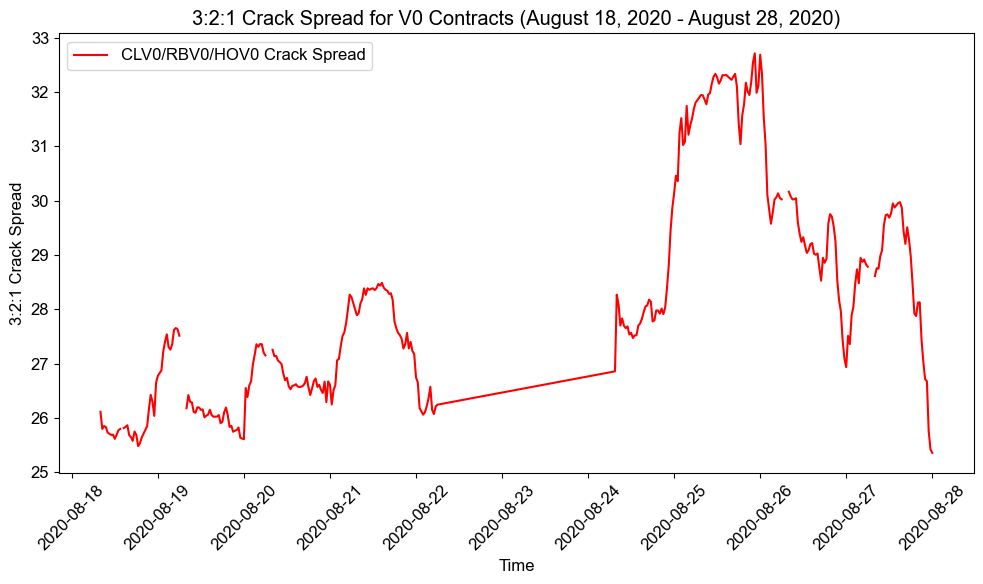

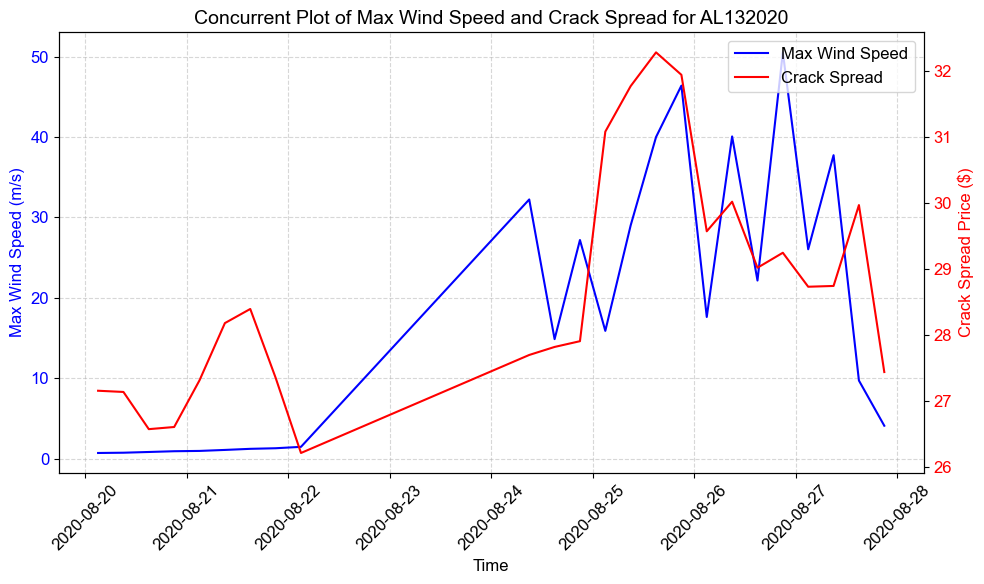

Phillips-Perron Test for AL132020 - Crack Spread Data
Test Statistic                 -3.962500
p-value                         0.009934
Lags Used                       9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.799351
Critical Value (5%)            -3.786728
Critical Value (10%)           -3.339917
dtype: float64
Lagrange multiplier statistic: 4.071480597036541
p-value: 0.04361303061113969
f-value: 4.4946928230646215
f p-value: 0.04551620048522613
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     14.77
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           0.000884
Time:                        17:44:24   Log-Likelihood:                -39.652
No. Obser

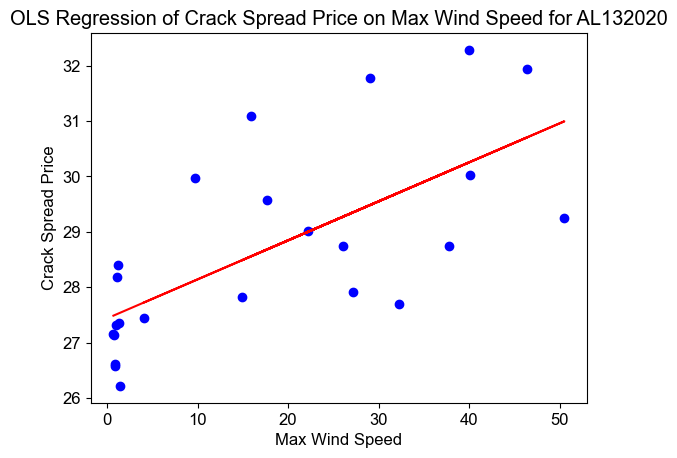

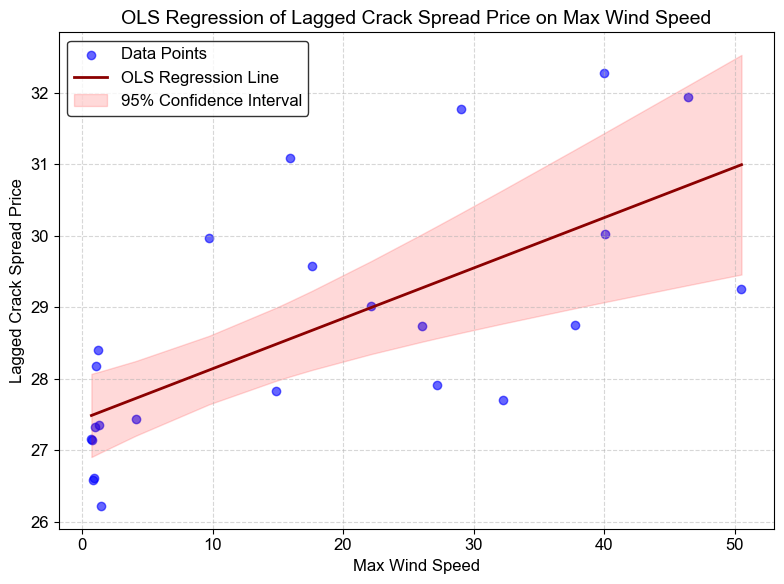

BD1: ['1', '1']
[1, 1]
[datetime.datetime(2020, 9, 11, 21, 0), datetime.datetime(2020, 9, 12, 3, 0), datetime.datetime(2020, 9, 12, 9, 0), datetime.datetime(2020, 9, 12, 15, 0), datetime.datetime(2020, 9, 12, 21, 0), datetime.datetime(2020, 9, 13, 3, 0), datetime.datetime(2020, 9, 13, 9, 0), datetime.datetime(2020, 9, 13, 15, 0), datetime.datetime(2020, 9, 13, 21, 0), datetime.datetime(2020, 9, 14, 3, 0), datetime.datetime(2020, 9, 14, 9, 0), datetime.datetime(2020, 9, 14, 15, 0), datetime.datetime(2020, 9, 14, 16, 0), datetime.datetime(2020, 9, 14, 21, 0), datetime.datetime(2020, 9, 15, 3, 0), datetime.datetime(2020, 9, 15, 9, 0), datetime.datetime(2020, 9, 15, 15, 0), datetime.datetime(2020, 9, 15, 21, 0), datetime.datetime(2020, 9, 16, 3, 0), datetime.datetime(2020, 9, 16, 6, 0), datetime.datetime(2020, 9, 16, 9, 0), datetime.datetime(2020, 9, 16, 15, 0), datetime.datetime(2020, 9, 16, 21, 0), datetime.datetime(2020, 9, 17, 3, 0), datetime.datetime(2020, 9, 17, 9, 0)]


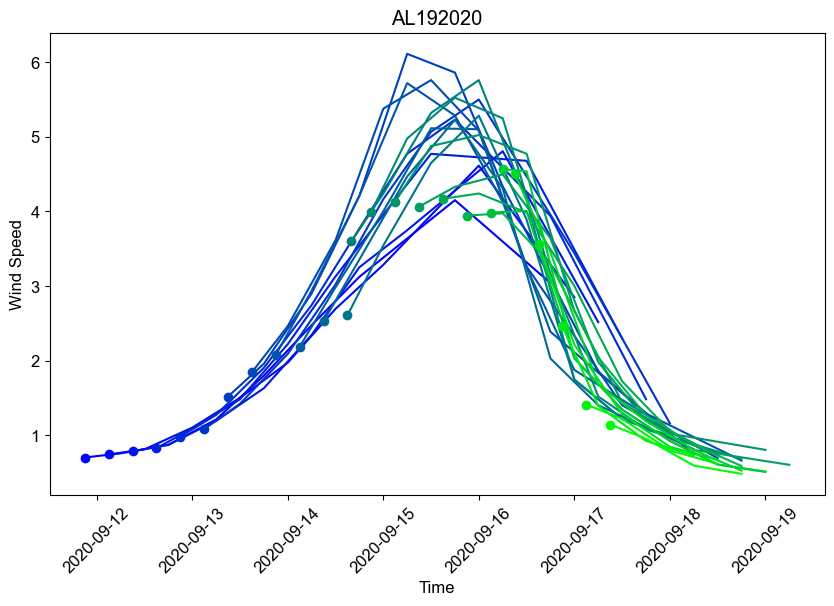

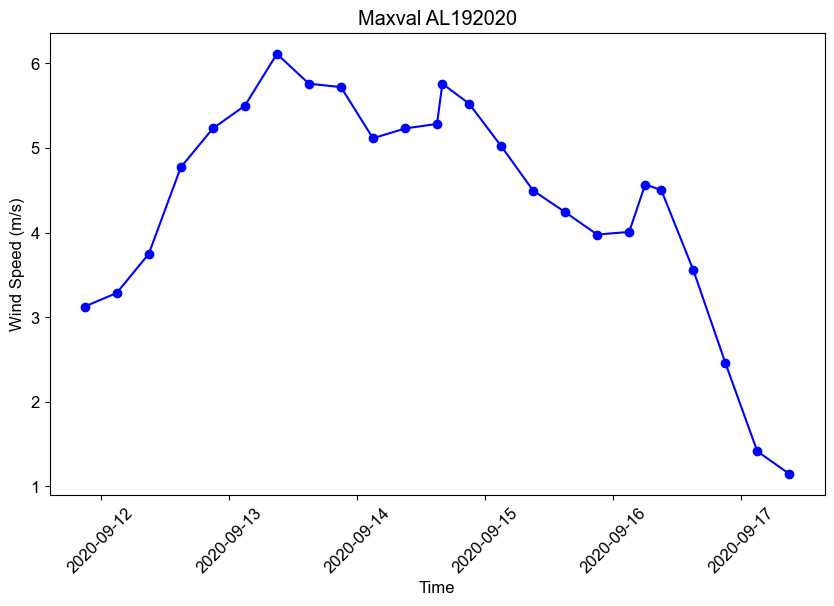

9
2020
2020-09-18 00:00:00


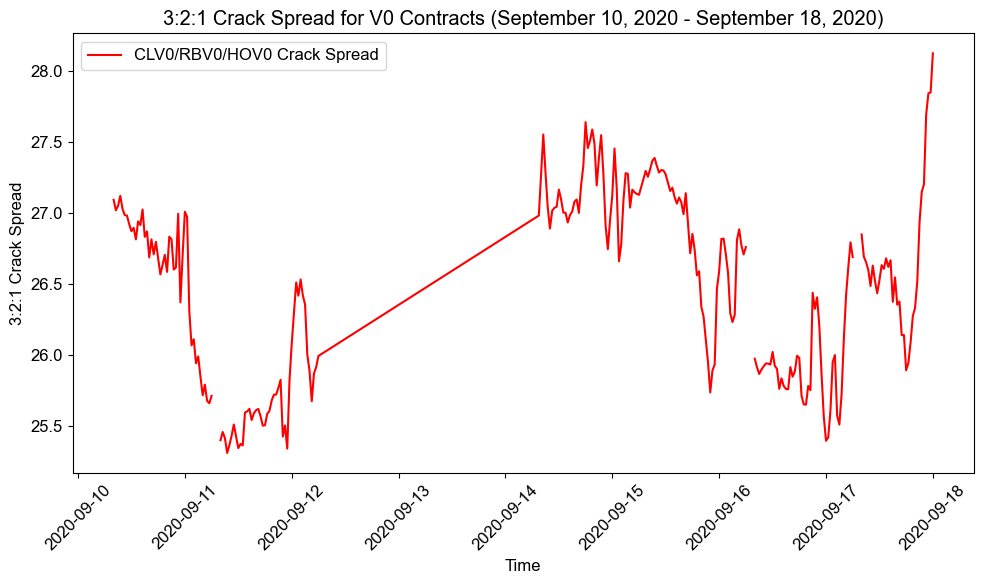

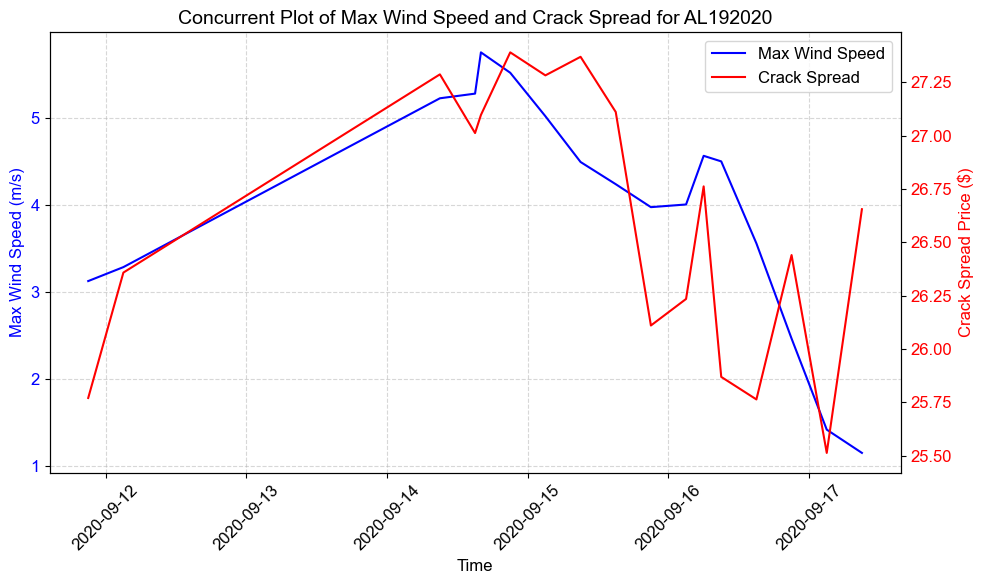

Phillips-Perron Test for AL192020 - Crack Spread Data
Test Statistic                 -1.663031
p-value                         0.766788
Lags Used                       5.000000
Number of Observations Used    11.000000
Critical Value (1%)            -5.117514
Critical Value (5%)            -3.918385
Critical Value (10%)           -3.411357
dtype: float64
Lagrange multiplier statistic: 2.3354897596010993
p-value: 0.12645521320739325
f-value: 2.388920313036212
f p-value: 0.14303204463598798
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     4.141
Date:                Wed, 10 Apr 2024   Prob (F-statistic):             0.0599
Time:                        17:44:24   Log-Likelihood:                -11.632
No. Obser

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


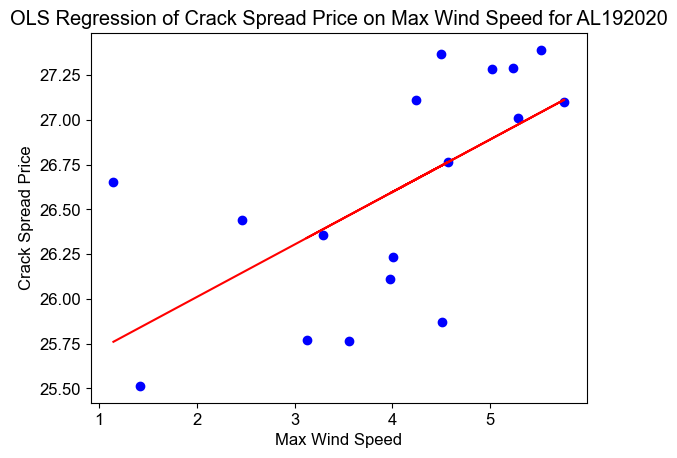

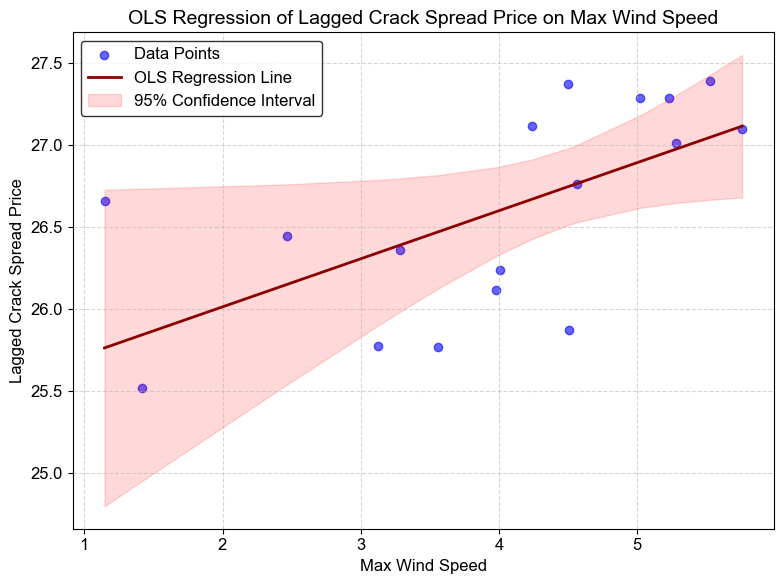

BD1: ['1', '7']
[1, 7]
[datetime.datetime(2020, 9, 17, 23, 0), datetime.datetime(2020, 9, 18, 3, 0), datetime.datetime(2020, 9, 18, 9, 0), datetime.datetime(2020, 9, 18, 15, 0), datetime.datetime(2020, 9, 18, 21, 0), datetime.datetime(2020, 9, 19, 3, 0), datetime.datetime(2020, 9, 19, 9, 0), datetime.datetime(2020, 9, 19, 15, 0), datetime.datetime(2020, 9, 19, 21, 0), datetime.datetime(2020, 9, 20, 3, 0), datetime.datetime(2020, 9, 20, 9, 0), datetime.datetime(2020, 9, 20, 15, 0), datetime.datetime(2020, 9, 20, 21, 0), datetime.datetime(2020, 9, 21, 3, 0), datetime.datetime(2020, 9, 21, 9, 0), datetime.datetime(2020, 9, 21, 15, 0), datetime.datetime(2020, 9, 21, 21, 0), datetime.datetime(2020, 9, 22, 3, 0), datetime.datetime(2020, 9, 22, 9, 0), datetime.datetime(2020, 9, 22, 15, 0), datetime.datetime(2020, 9, 22, 21, 0)]


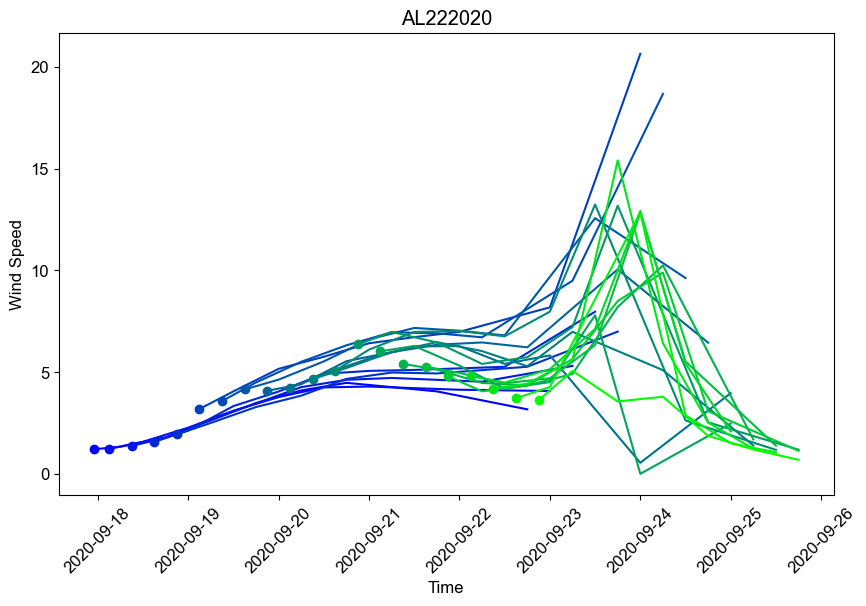

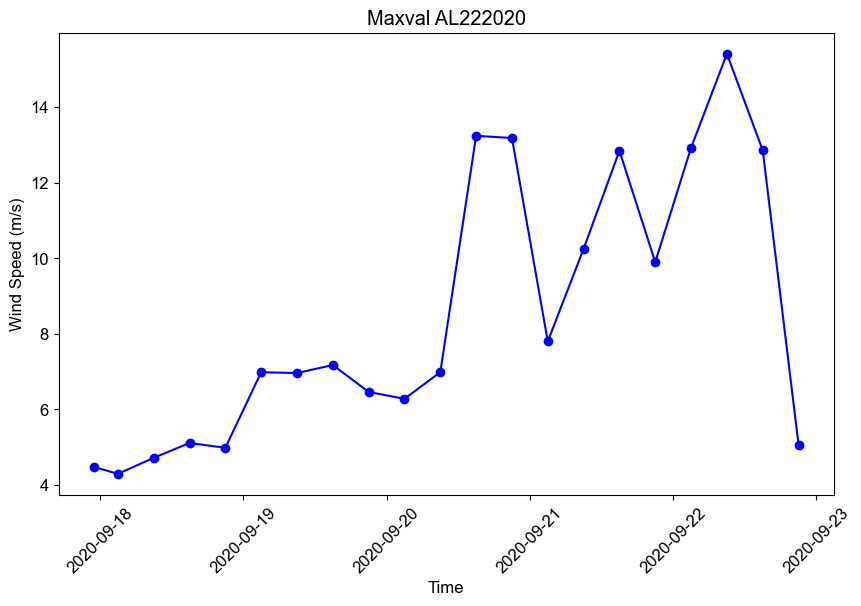

9
2020
2020-09-25 00:00:00


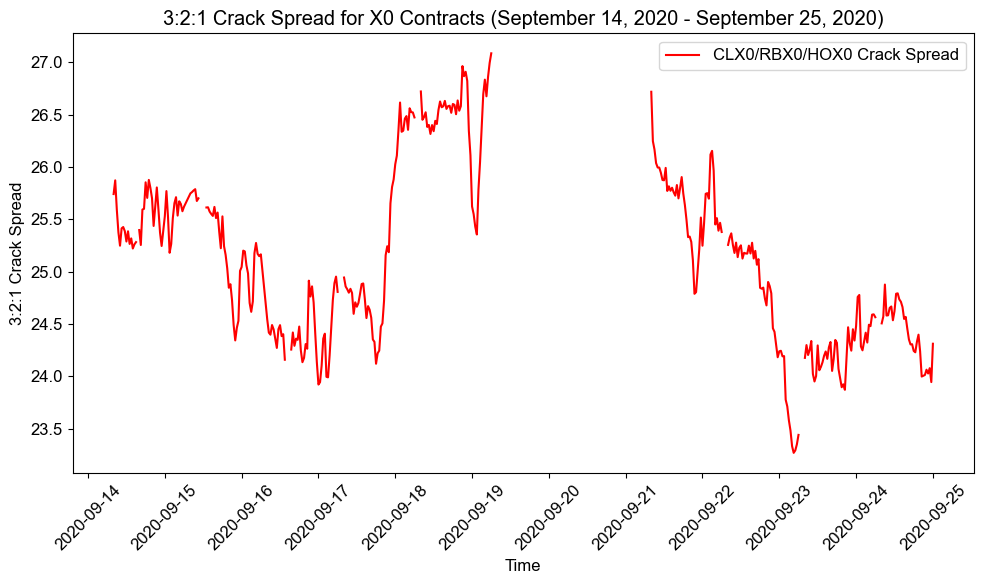

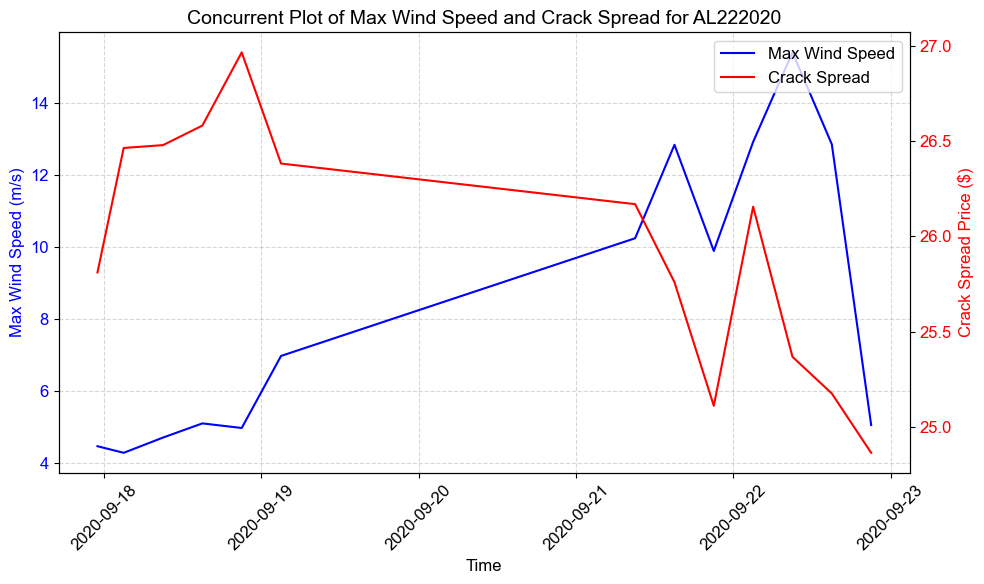

Phillips-Perron Test for AL222020 - Crack Spread Data
Test Statistic                -3.110984
p-value                        0.103641
Lags Used                      3.000000
Number of Observations Used    9.000000
Critical Value (1%)           -5.499659
Critical Value (5%)           -4.072109
Critical Value (10%)          -3.493495
dtype: float64
Lagrange multiplier statistic: 1.063333375569266
p-value: 0.30245614872429705
f-value: 0.9798939267787201
f p-value: 0.34350005352422386
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     3.283
Date:                Wed, 10 Apr 2024   Prob (F-statistic):             0.0974
Time:                        17:44:25   Log-Likelihood:                -10.912
No. Observations

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


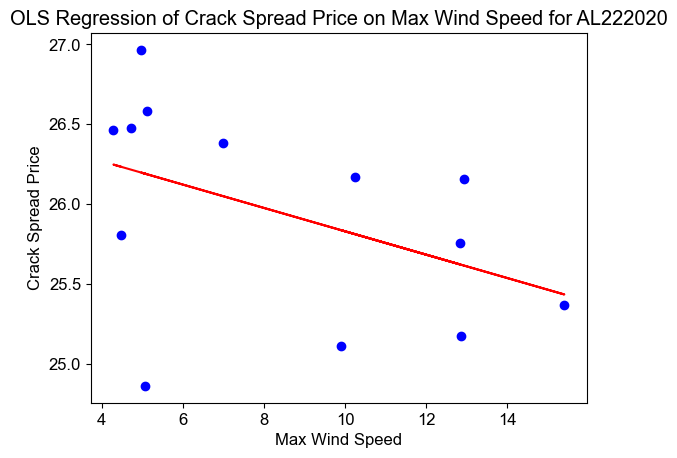

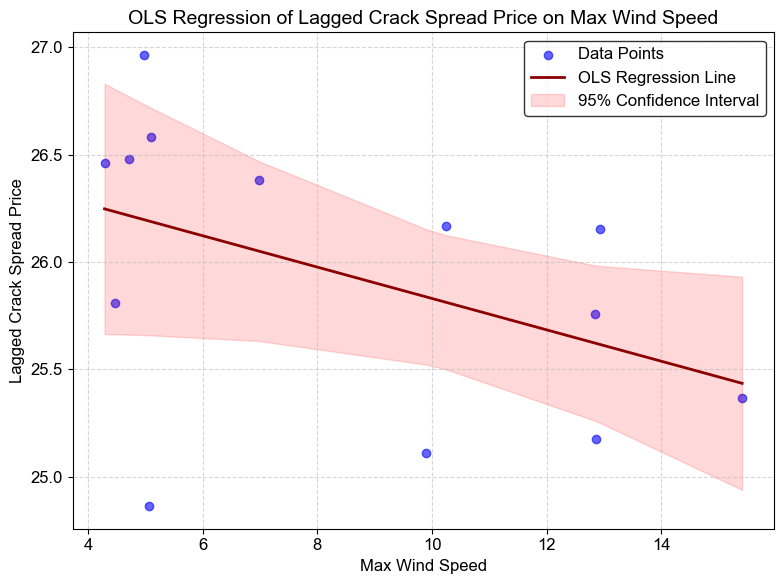

BD1: ['2', '0']
[2, 0]
[datetime.datetime(2020, 8, 20, 15, 0), datetime.datetime(2020, 8, 20, 21, 0), datetime.datetime(2020, 8, 21, 3, 0), datetime.datetime(2020, 8, 21, 9, 0), datetime.datetime(2020, 8, 21, 15, 0), datetime.datetime(2020, 8, 21, 21, 0), datetime.datetime(2020, 8, 22, 3, 0), datetime.datetime(2020, 8, 22, 9, 0), datetime.datetime(2020, 8, 22, 15, 0), datetime.datetime(2020, 8, 22, 21, 0), datetime.datetime(2020, 8, 23, 3, 0), datetime.datetime(2020, 8, 23, 9, 0), datetime.datetime(2020, 8, 23, 15, 0), datetime.datetime(2020, 8, 23, 21, 0), datetime.datetime(2020, 8, 24, 3, 0), datetime.datetime(2020, 8, 24, 9, 0), datetime.datetime(2020, 8, 24, 15, 0), datetime.datetime(2020, 8, 24, 18, 0), datetime.datetime(2020, 8, 24, 21, 0), datetime.datetime(2020, 8, 25, 3, 0), datetime.datetime(2020, 8, 25, 9, 0)]


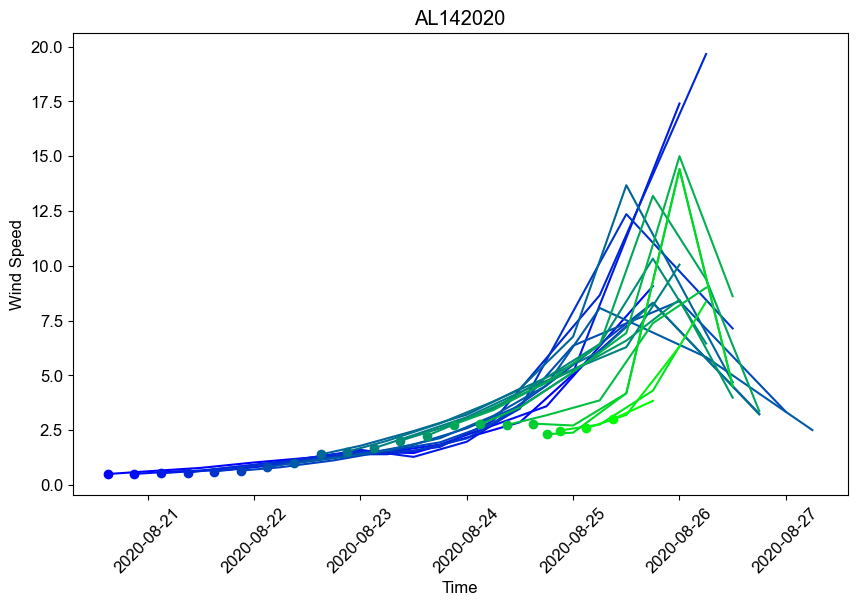

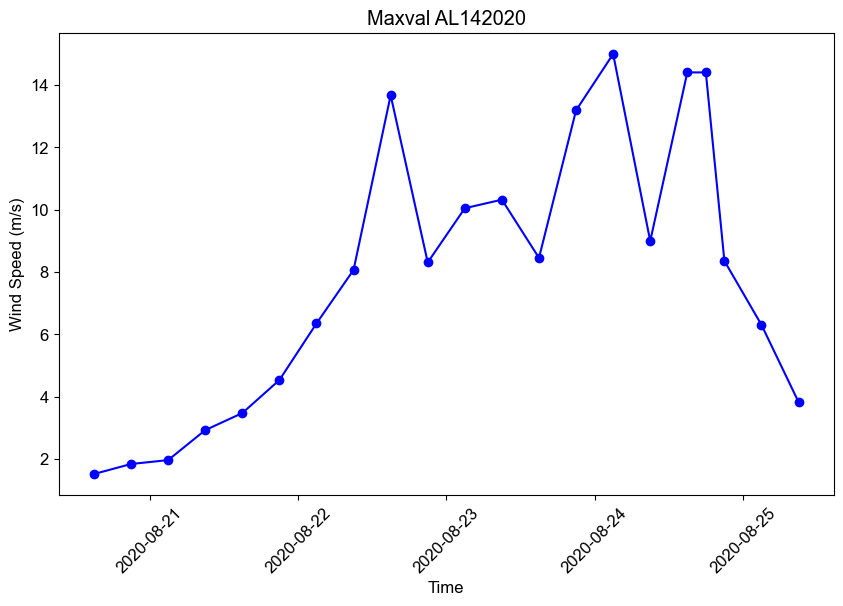

8
2020
2020-08-28 00:00:00


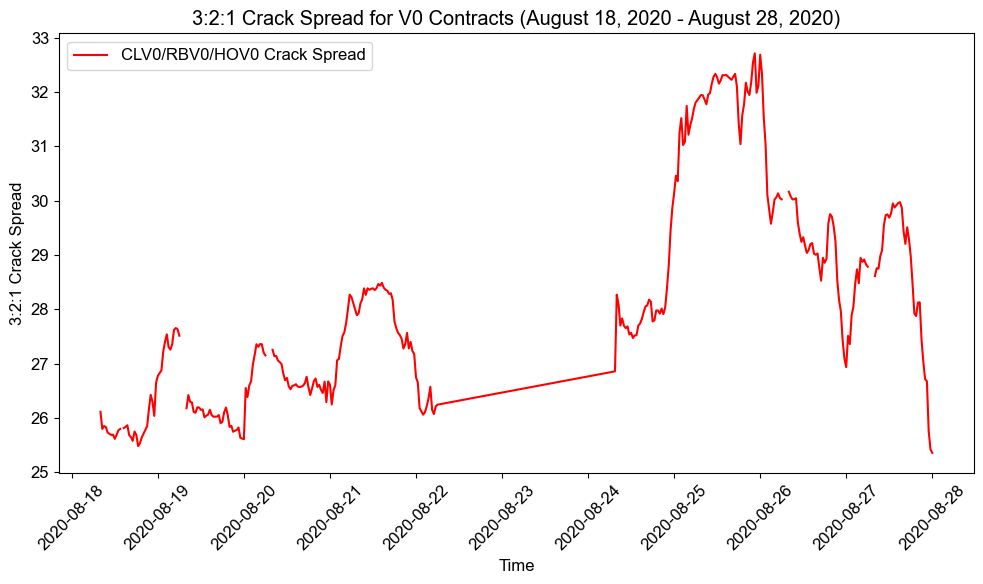

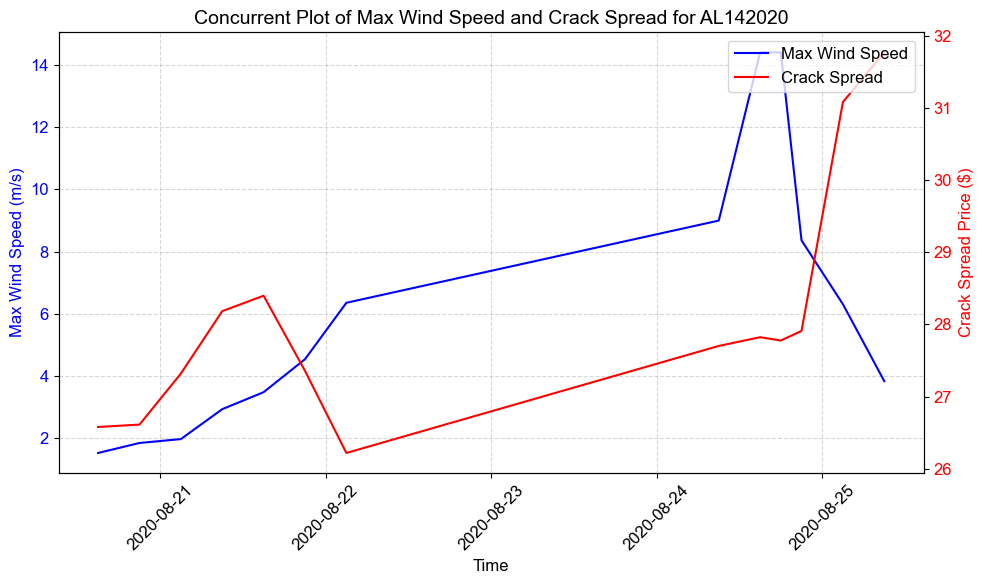

Phillips-Perron Test for AL142020 - Crack Spread Data
Test Statistic                 -1.029503
p-value                         0.940011
Lags Used                       0.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.988248
Critical Value (5%)            -3.865365
Critical Value (10%)           -3.382725
dtype: float64
Lagrange multiplier statistic: 0.5624849207600193
p-value: 0.45326075938194776
f-value: 0.4974734976352125
f p-value: 0.4952771688650178
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.090
Method:                 Least Squares   F-statistic:                   0.01396
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.908
Time:                        17:44:26   Log-Likelihood:                -24.317
No. Obser

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


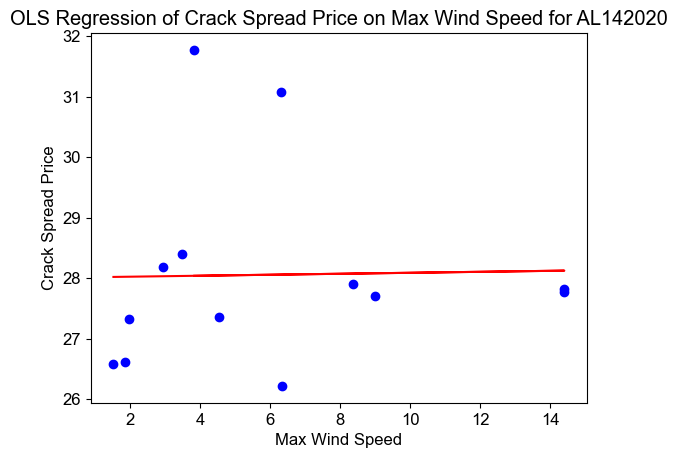

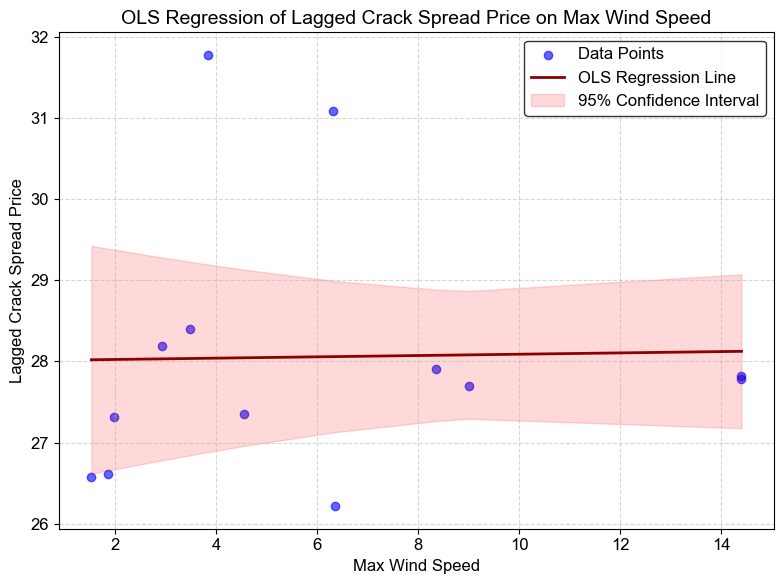

BD1: ['1', '9']
[1, 9]
[datetime.datetime(2017, 6, 19, 21, 0), datetime.datetime(2017, 6, 20, 3, 0), datetime.datetime(2017, 6, 20, 9, 0), datetime.datetime(2017, 6, 20, 15, 0), datetime.datetime(2017, 6, 20, 21, 0), datetime.datetime(2017, 6, 21, 3, 0), datetime.datetime(2017, 6, 21, 9, 0), datetime.datetime(2017, 6, 21, 15, 0), datetime.datetime(2017, 6, 21, 21, 0), datetime.datetime(2017, 6, 22, 3, 0), datetime.datetime(2017, 6, 22, 9, 0), datetime.datetime(2017, 6, 22, 15, 0)]


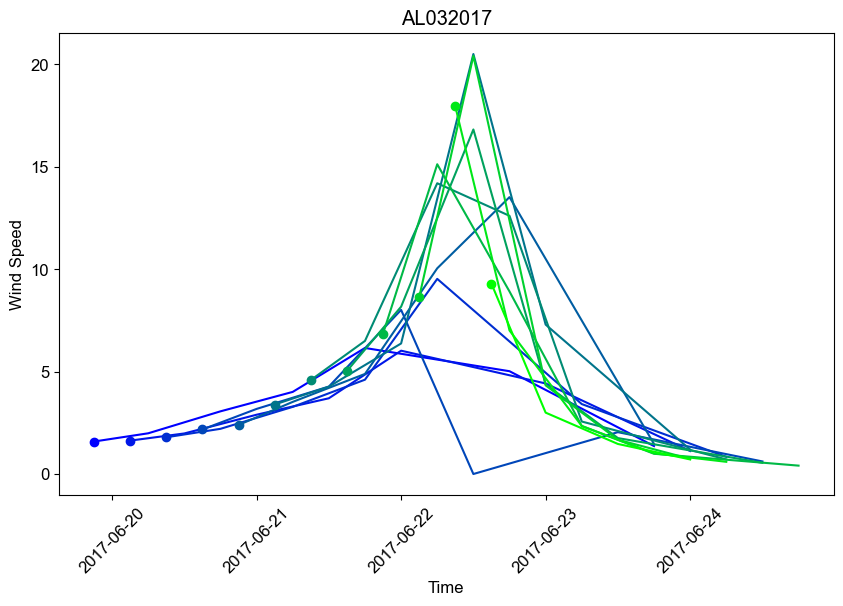

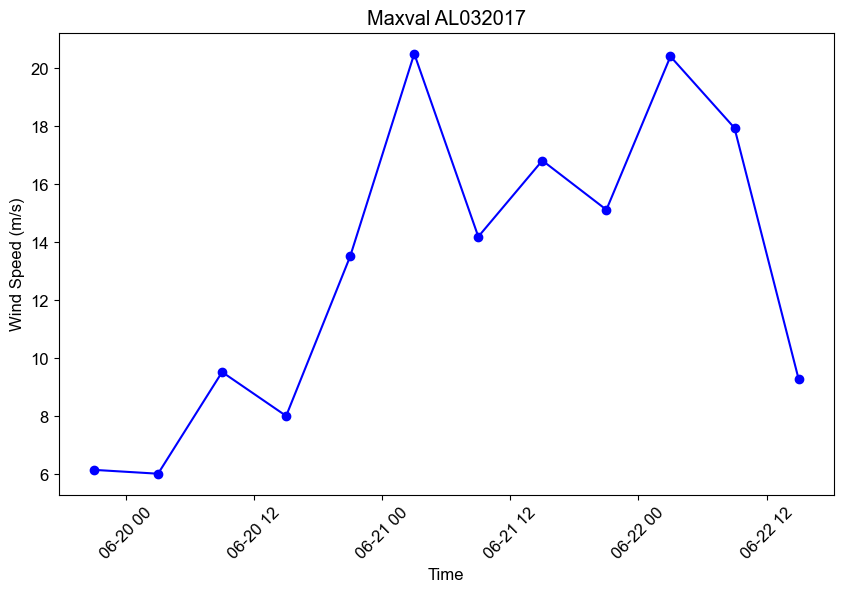

6
2017
2017-06-23 00:00:00


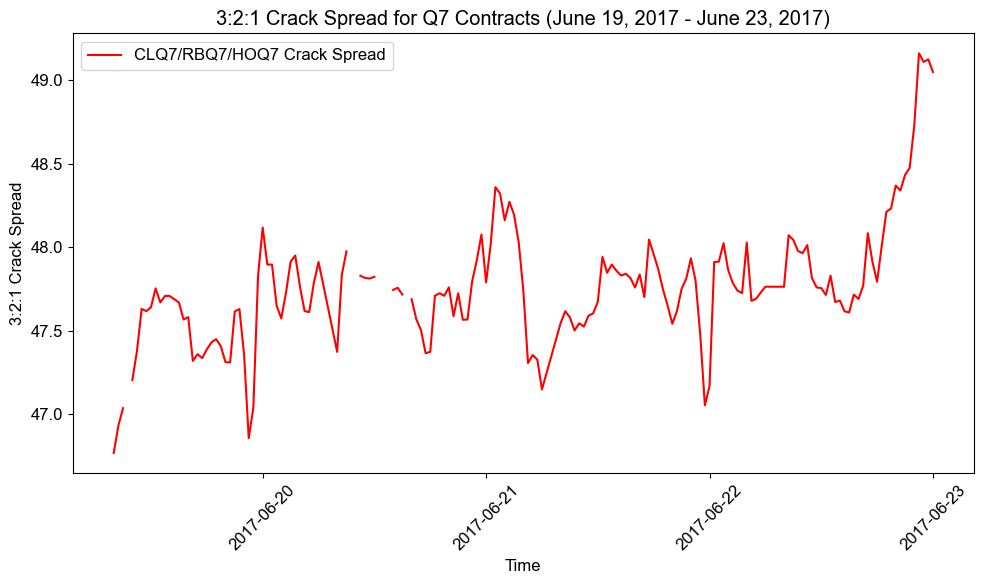

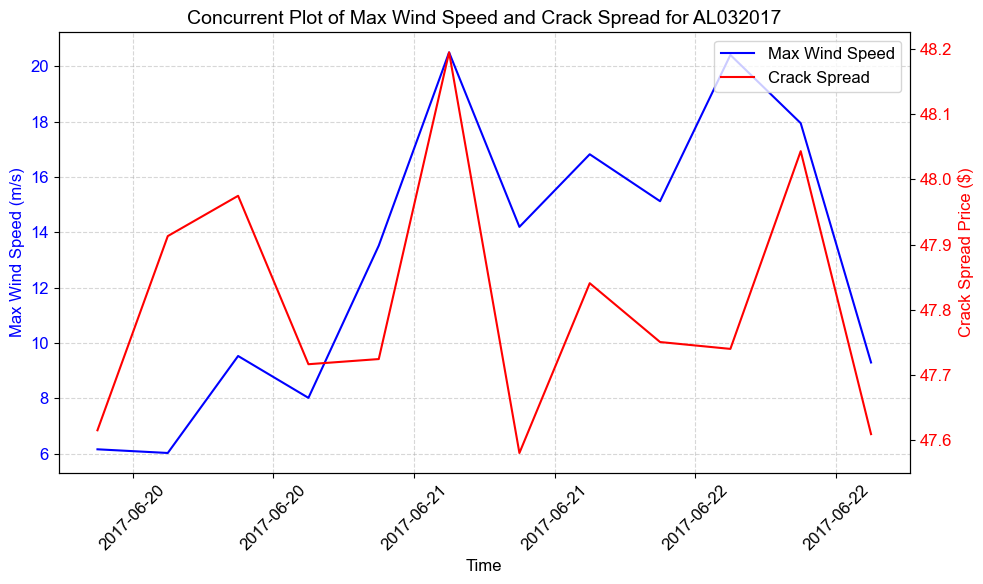

Phillips-Perron Test for AL032017 - Crack Spread Data
Test Statistic                 -4.855255
p-value                         0.000374
Lags Used                       1.000000
Number of Observations Used    10.000000
Critical Value (1%)            -5.282515
Critical Value (5%)            -3.985264
Critical Value (10%)           -3.447240
dtype: float64
Lagrange multiplier statistic: 0.8658373380266711
p-value: 0.35211029305282493
f-value: 0.7776402809200721
f p-value: 0.3985644635715426
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1.127
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.313
Time:                        17:44:27   Log-Likelihood:                 4.5151
No. Obser

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


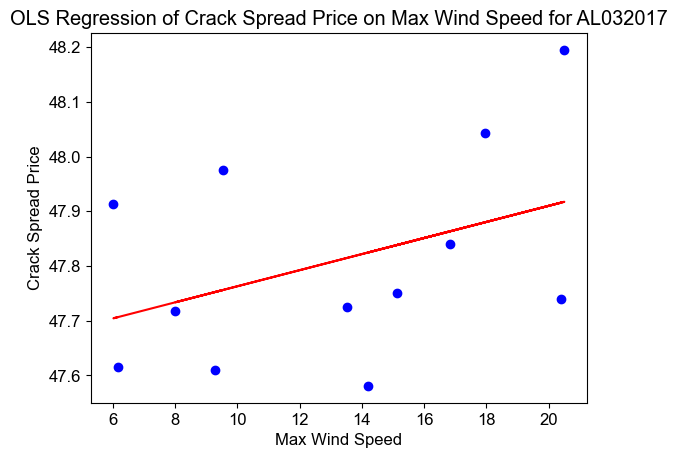

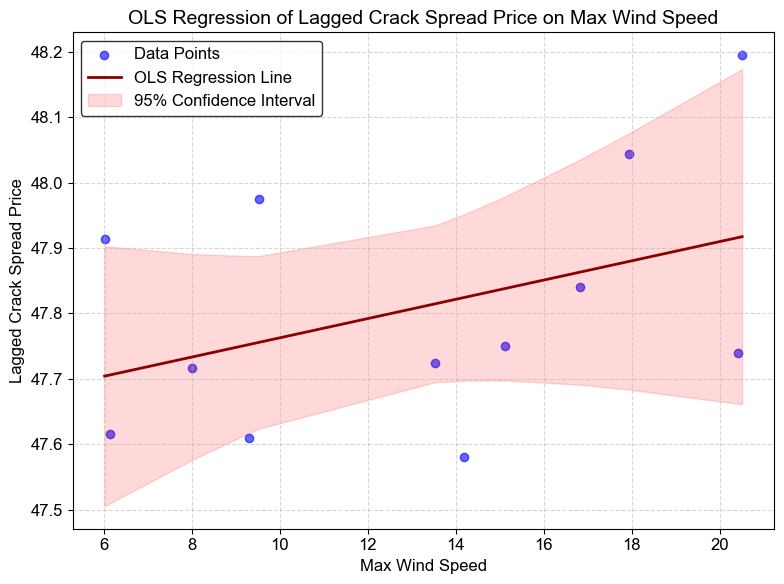

BD1: ['2', '1']
[2, 1]
[datetime.datetime(2012, 8, 21, 9, 0), datetime.datetime(2012, 8, 21, 15, 0), datetime.datetime(2012, 8, 21, 21, 0), datetime.datetime(2012, 8, 22, 3, 0), datetime.datetime(2012, 8, 22, 9, 0), datetime.datetime(2012, 8, 22, 15, 0), datetime.datetime(2012, 8, 22, 21, 0), datetime.datetime(2012, 8, 23, 3, 0), datetime.datetime(2012, 8, 23, 9, 0), datetime.datetime(2012, 8, 23, 15, 0), datetime.datetime(2012, 8, 23, 21, 0), datetime.datetime(2012, 8, 24, 3, 0), datetime.datetime(2012, 8, 24, 9, 0), datetime.datetime(2012, 8, 24, 15, 0), datetime.datetime(2012, 8, 24, 21, 0), datetime.datetime(2012, 8, 25, 3, 0), datetime.datetime(2012, 8, 25, 9, 0), datetime.datetime(2012, 8, 25, 15, 0), datetime.datetime(2012, 8, 25, 21, 0), datetime.datetime(2012, 8, 26, 3, 0), datetime.datetime(2012, 8, 26, 9, 0), datetime.datetime(2012, 8, 26, 15, 0), datetime.datetime(2012, 8, 26, 21, 0), datetime.datetime(2012, 8, 27, 3, 0), datetime.datetime(2012, 8, 27, 9, 0), datetime.datet

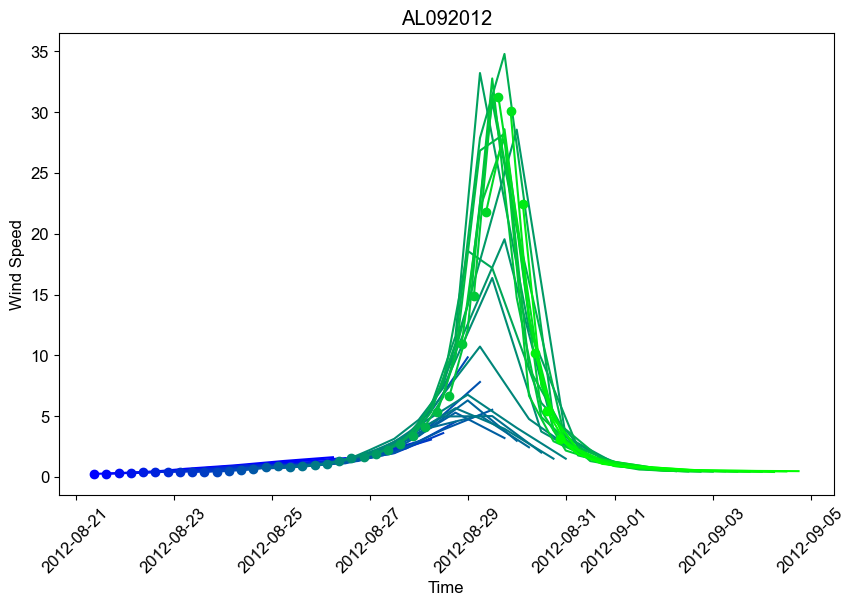

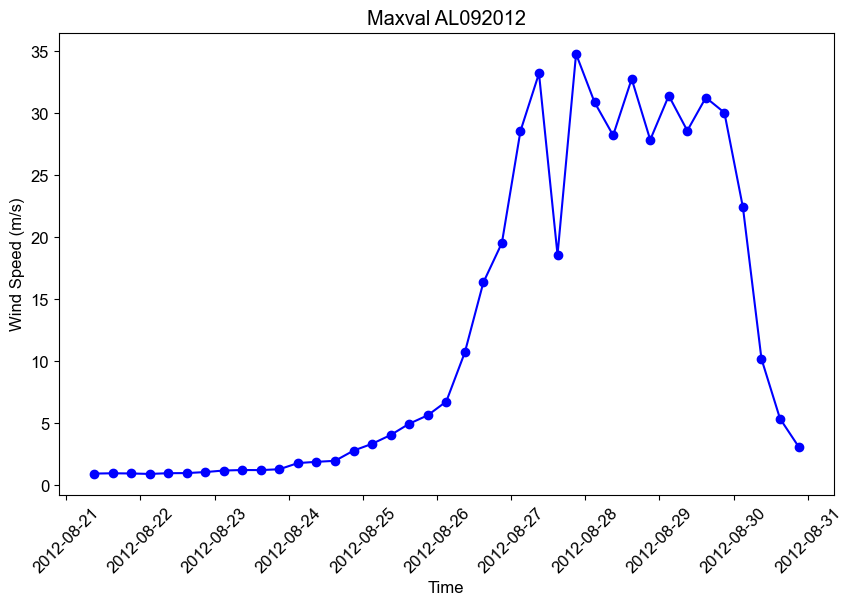

8
2012
2012-08-31 00:00:00


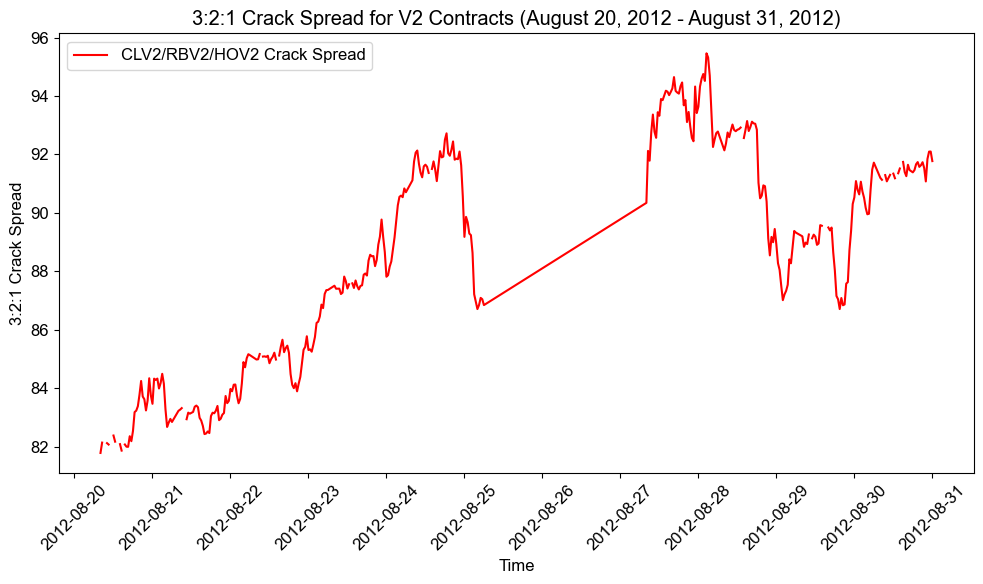

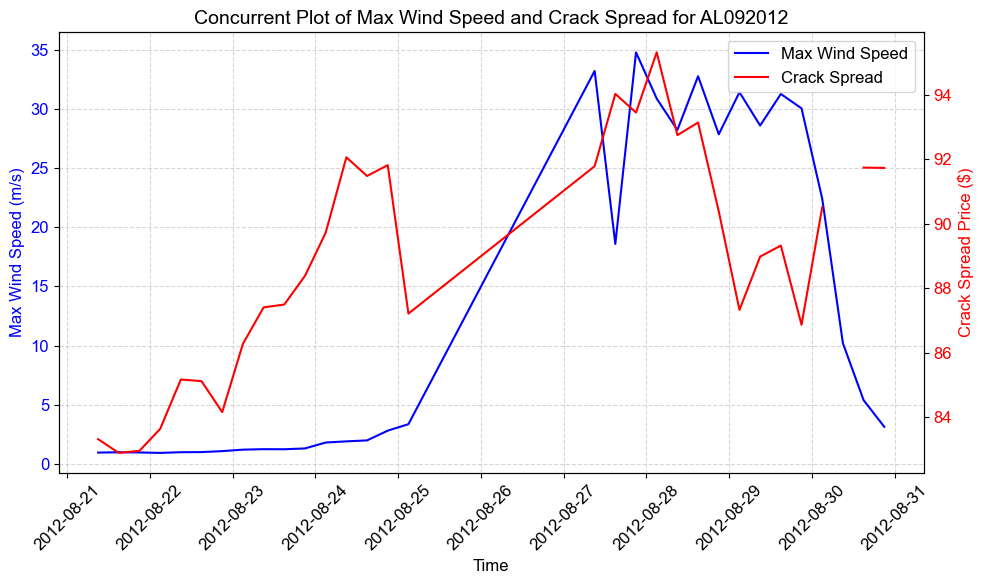

Phillips-Perron Test for AL092012 - Crack Spread Data
Test Statistic                 -2.077003
p-value                         0.558948
Lags Used                       0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -4.310249
Critical Value (5%)            -3.574488
Critical Value (10%)           -3.221793
dtype: float64
Lagrange multiplier statistic: 1.1189315127049915
p-value: 0.29014864325094836
f-value: 1.0847965119269065
f p-value: 0.30653713968301866
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.81
Date:                Wed, 10 Apr 2024   Prob (F-statistic):            0.00186
Time:                        17:44:28   Log-Likelihood:                -75.523
No. Obse

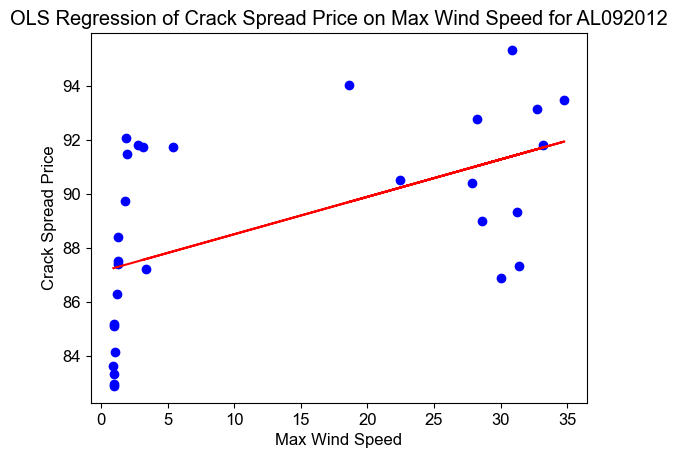

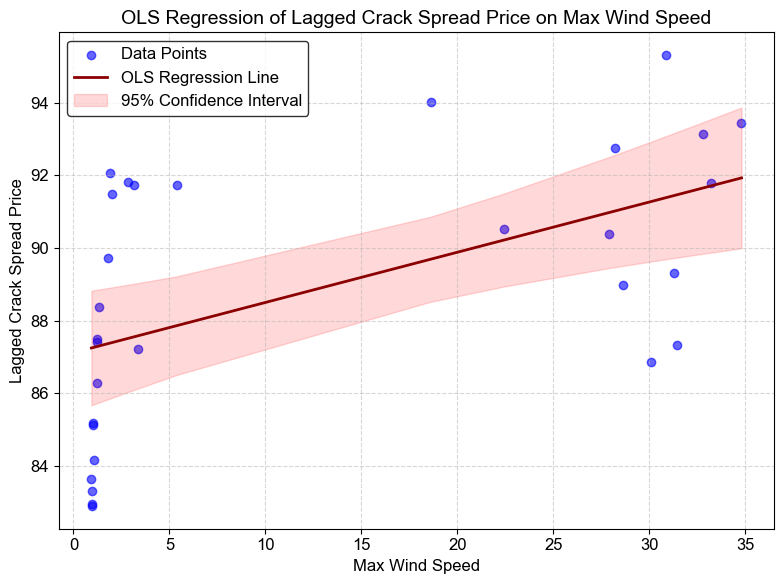

BD1: ['0', '4']
[0, 4]
[datetime.datetime(2017, 10, 4, 15, 0), datetime.datetime(2017, 10, 4, 21, 0), datetime.datetime(2017, 10, 5, 3, 0), datetime.datetime(2017, 10, 5, 9, 0), datetime.datetime(2017, 10, 5, 15, 0), datetime.datetime(2017, 10, 5, 21, 0), datetime.datetime(2017, 10, 6, 3, 0), datetime.datetime(2017, 10, 6, 9, 0), datetime.datetime(2017, 10, 6, 15, 0), datetime.datetime(2017, 10, 6, 21, 0), datetime.datetime(2017, 10, 7, 3, 0), datetime.datetime(2017, 10, 7, 9, 0), datetime.datetime(2017, 10, 7, 15, 0), datetime.datetime(2017, 10, 7, 21, 0), datetime.datetime(2017, 10, 8, 3, 0), datetime.datetime(2017, 10, 8, 9, 0), datetime.datetime(2017, 10, 8, 15, 0)]


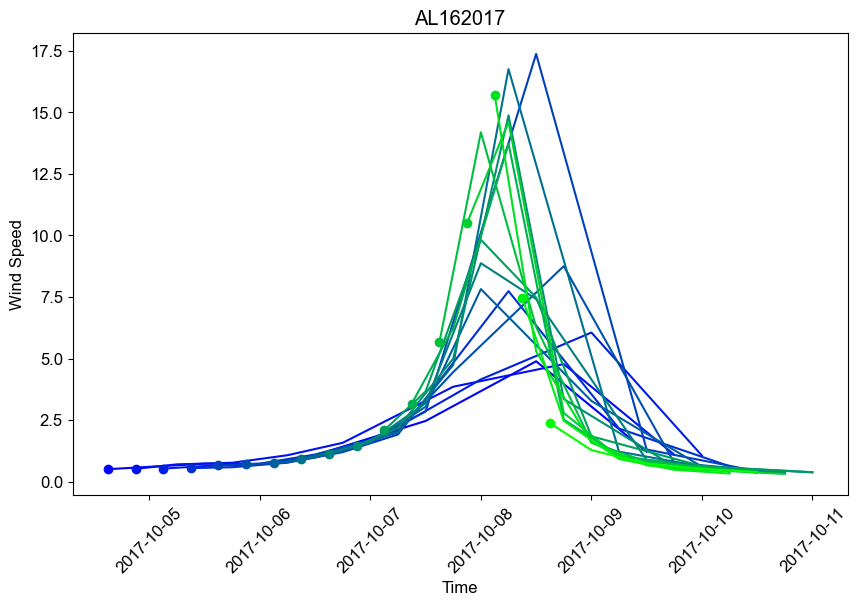

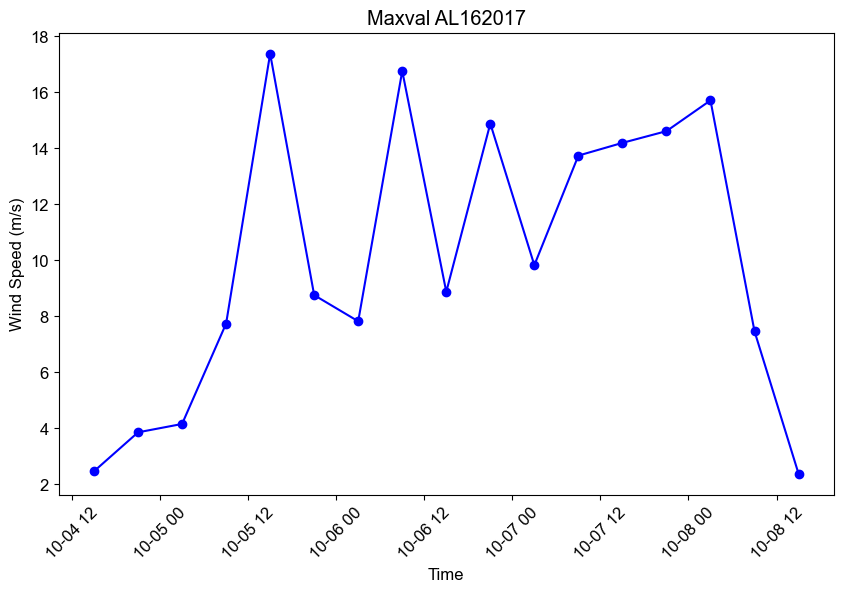

10
2017
2017-10-09 00:00:00


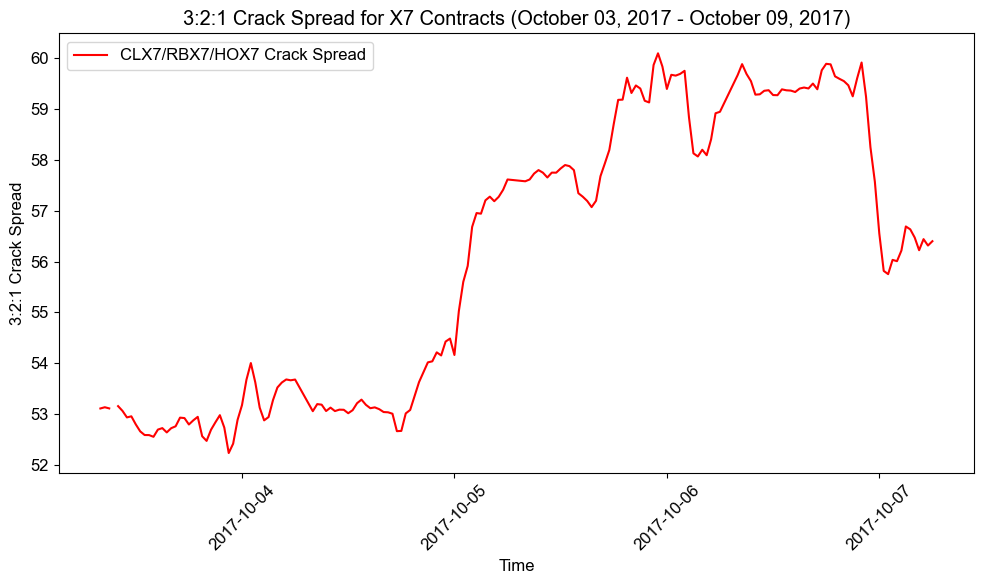

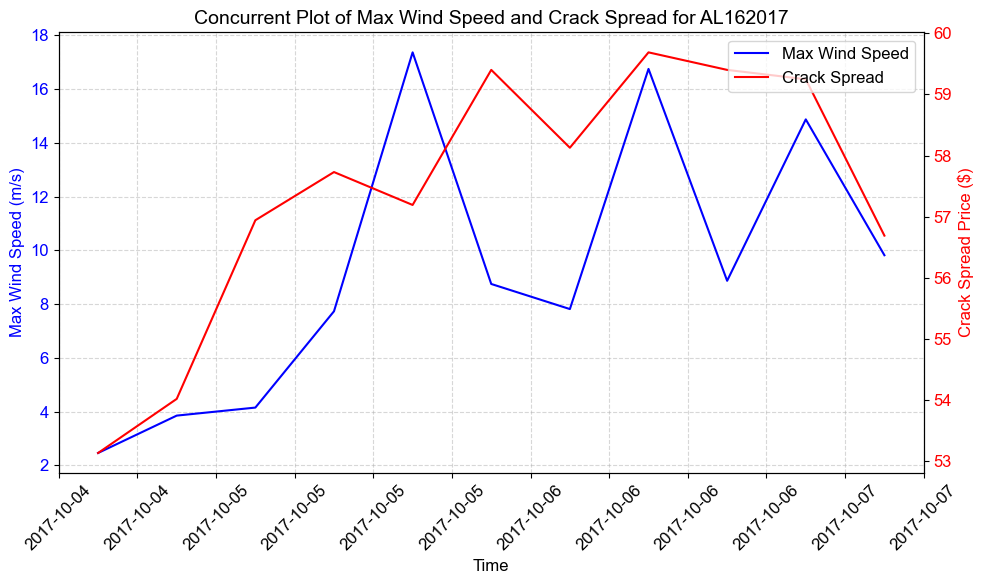

Phillips-Perron Test for AL162017 - Crack Spread Data
Test Statistic                 -0.813221
p-value                         0.964551
Lags Used                       0.000000
Number of Observations Used    10.000000
Critical Value (1%)            -5.282515
Critical Value (5%)            -3.985264
Critical Value (10%)           -3.447240
dtype: float64
Lagrange multiplier statistic: 0.3549290408861401
p-value: 0.5513360943065503
f-value: 0.3000789172983752
f p-value: 0.5971545799040117
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     3.169
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.109
Time:                        17:44:29   Log-Likelihood:                -20.739
No. Observ

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


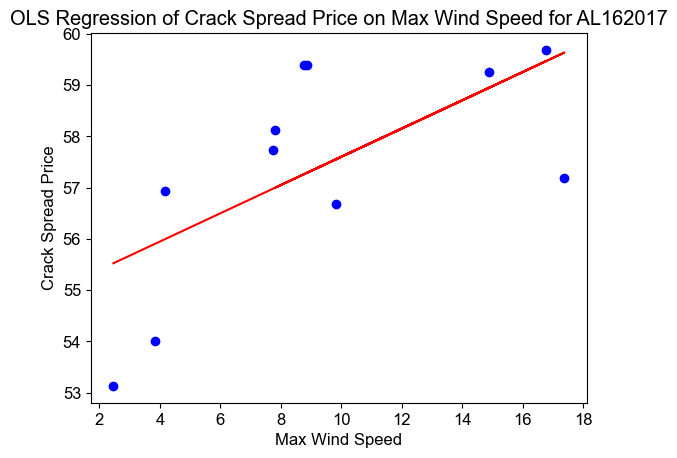

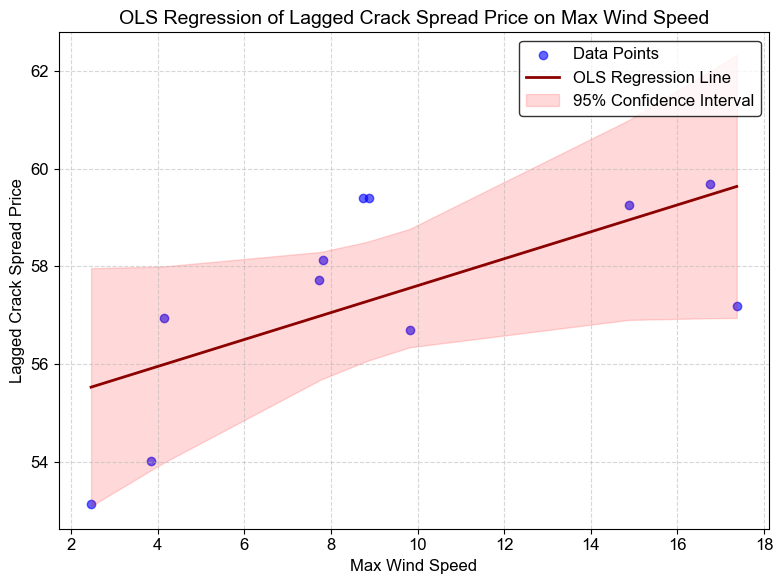

BD1: ['0', '1']
[0, 1]
[datetime.datetime(2020, 6, 1, 21, 0), datetime.datetime(2020, 6, 2, 3, 0), datetime.datetime(2020, 6, 2, 9, 0), datetime.datetime(2020, 6, 2, 15, 0), datetime.datetime(2020, 6, 2, 21, 0), datetime.datetime(2020, 6, 3, 3, 0), datetime.datetime(2020, 6, 3, 9, 0), datetime.datetime(2020, 6, 3, 15, 0), datetime.datetime(2020, 6, 3, 21, 0), datetime.datetime(2020, 6, 4, 3, 0), datetime.datetime(2020, 6, 4, 9, 0), datetime.datetime(2020, 6, 4, 15, 0), datetime.datetime(2020, 6, 4, 21, 0), datetime.datetime(2020, 6, 5, 3, 0), datetime.datetime(2020, 6, 5, 9, 0), datetime.datetime(2020, 6, 5, 15, 0), datetime.datetime(2020, 6, 5, 21, 0), datetime.datetime(2020, 6, 6, 3, 0), datetime.datetime(2020, 6, 6, 9, 0), datetime.datetime(2020, 6, 6, 15, 0), datetime.datetime(2020, 6, 6, 21, 0), datetime.datetime(2020, 6, 7, 3, 0), datetime.datetime(2020, 6, 7, 9, 0), datetime.datetime(2020, 6, 7, 15, 0), datetime.datetime(2020, 6, 7, 21, 0), datetime.datetime(2020, 6, 8, 3, 0), d

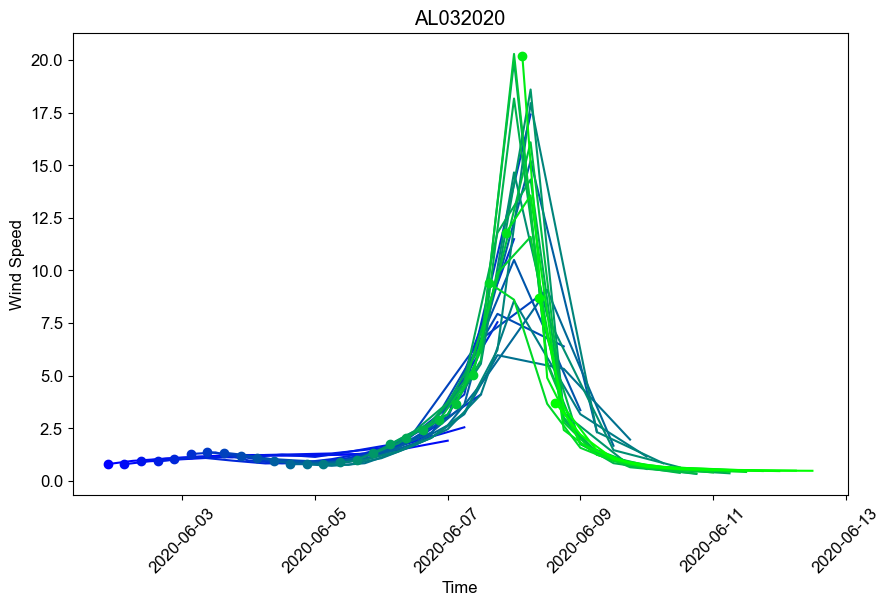

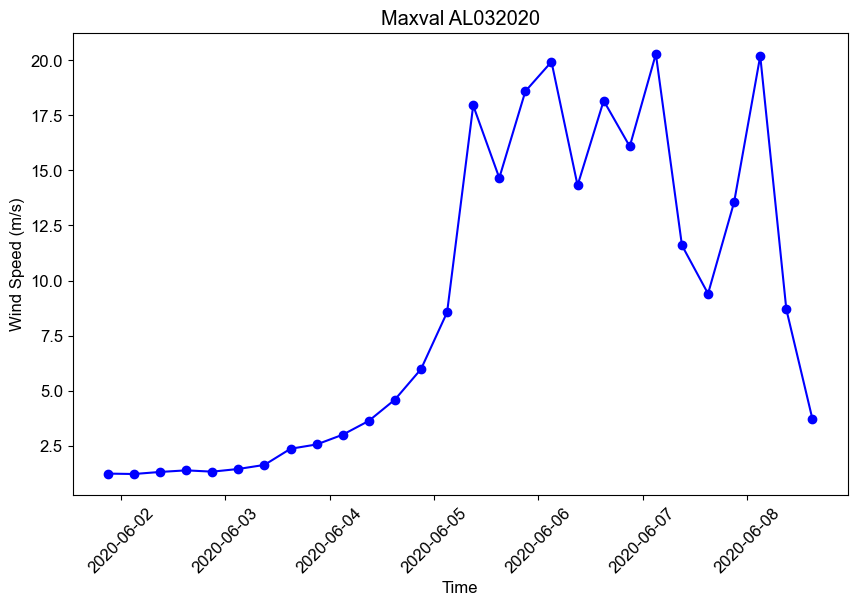

6
2020
2020-06-26 00:00:00


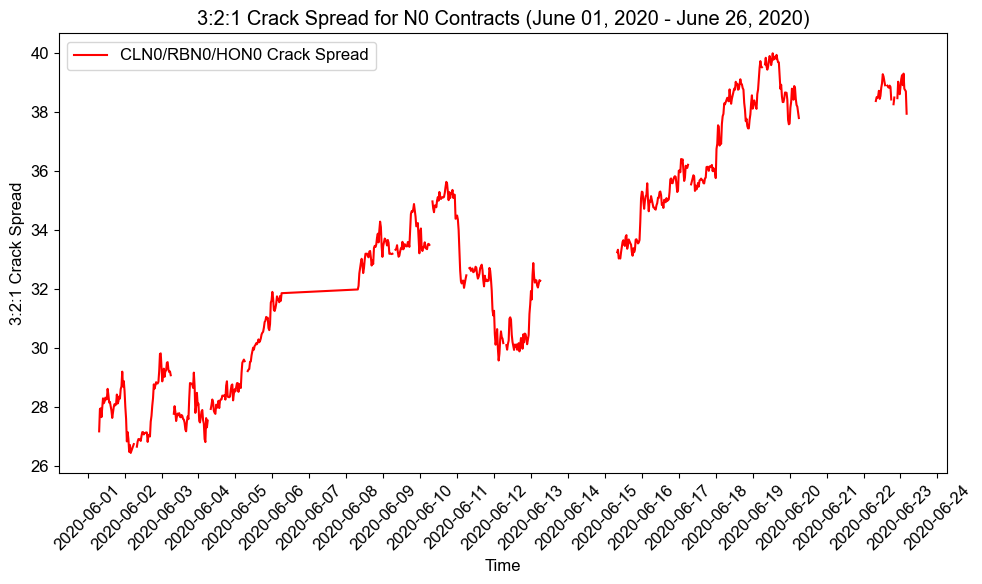

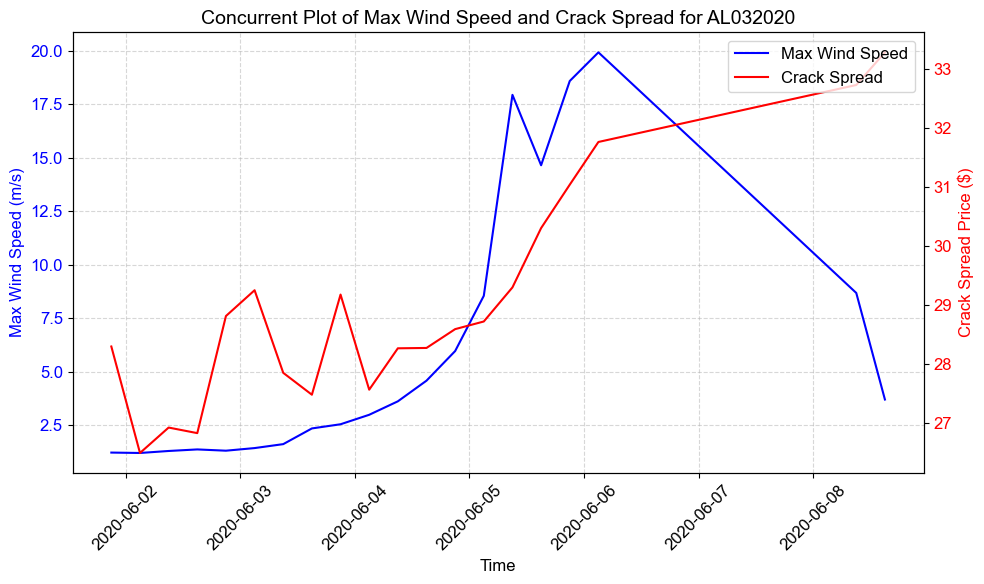

Phillips-Perron Test for AL032020 - Crack Spread Data
Test Statistic                 -0.505735
p-value                         0.983207
Lags Used                       5.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.799351
Critical Value (5%)            -3.786728
Critical Value (10%)           -3.339917
dtype: float64
Lagrange multiplier statistic: 0.07188406851906581
p-value: 0.7886130748076323
f-value: 0.06492902980854011
f p-value: 0.8017570129344289
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     13.67
Date:                Wed, 10 Apr 2024   Prob (F-statistic):            0.00165
Time:                        17:44:29   Log-Likelihood:                -36.913
No. Obse

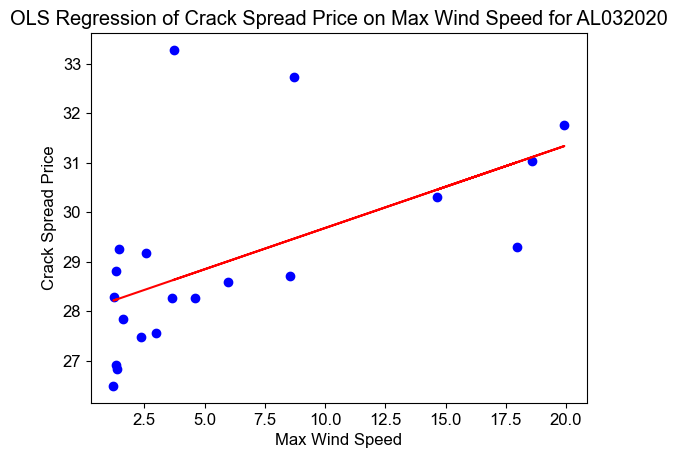

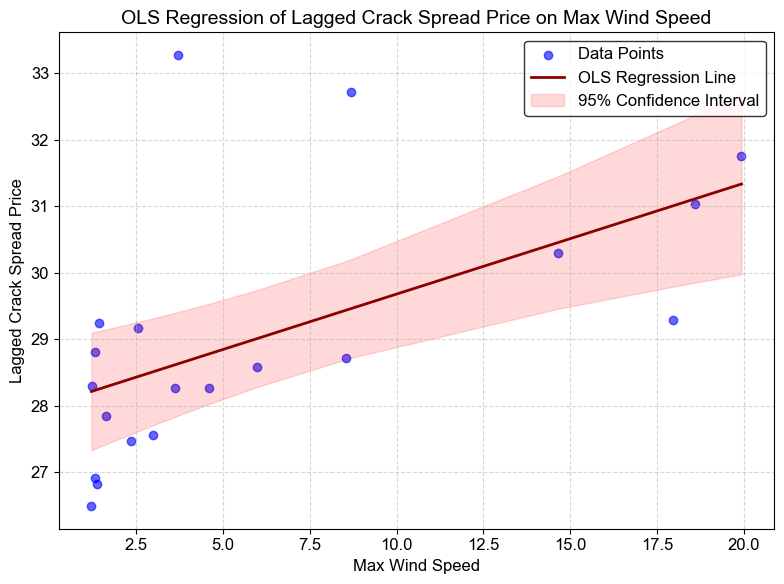

BD1: ['1', '0']
[1, 0]
[datetime.datetime(2019, 6, 10, 15, 0), datetime.datetime(2019, 6, 10, 21, 0), datetime.datetime(2019, 6, 11, 3, 0), datetime.datetime(2019, 6, 11, 9, 0), datetime.datetime(2019, 6, 11, 15, 0), datetime.datetime(2019, 6, 11, 21, 0), datetime.datetime(2019, 6, 12, 3, 0), datetime.datetime(2019, 6, 12, 9, 0), datetime.datetime(2019, 6, 12, 15, 0), datetime.datetime(2019, 6, 12, 21, 0), datetime.datetime(2019, 6, 13, 3, 0), datetime.datetime(2019, 6, 13, 9, 0), datetime.datetime(2019, 6, 13, 15, 0), datetime.datetime(2019, 6, 13, 21, 0), datetime.datetime(2019, 6, 14, 3, 0), datetime.datetime(2019, 6, 14, 9, 0), datetime.datetime(2019, 6, 14, 15, 0), datetime.datetime(2019, 6, 14, 21, 0)]


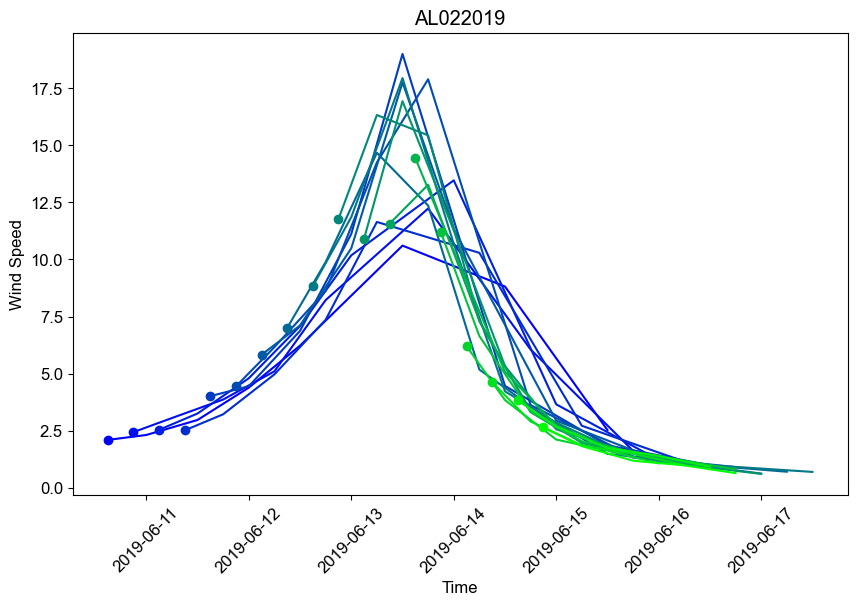

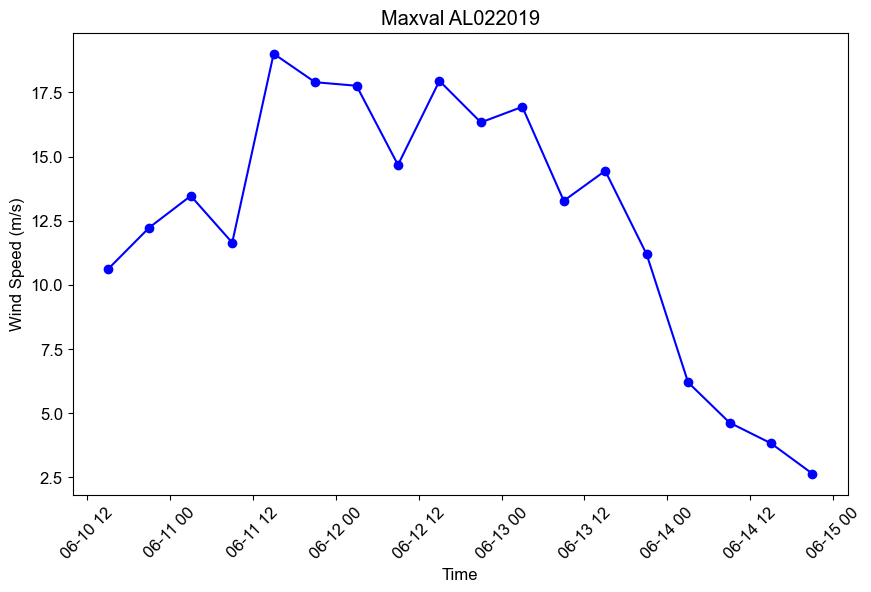

6
2019
2019-06-14 00:00:00


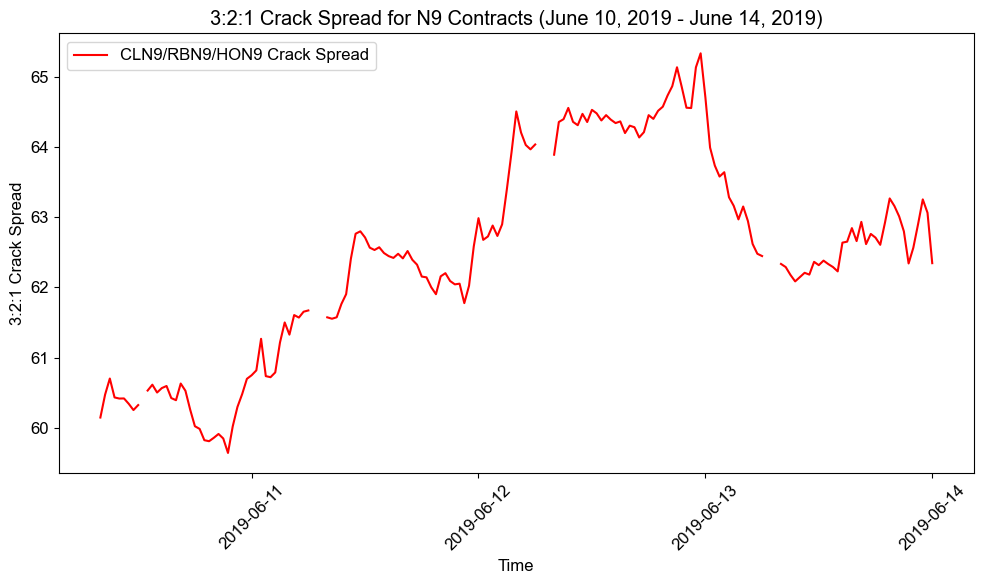

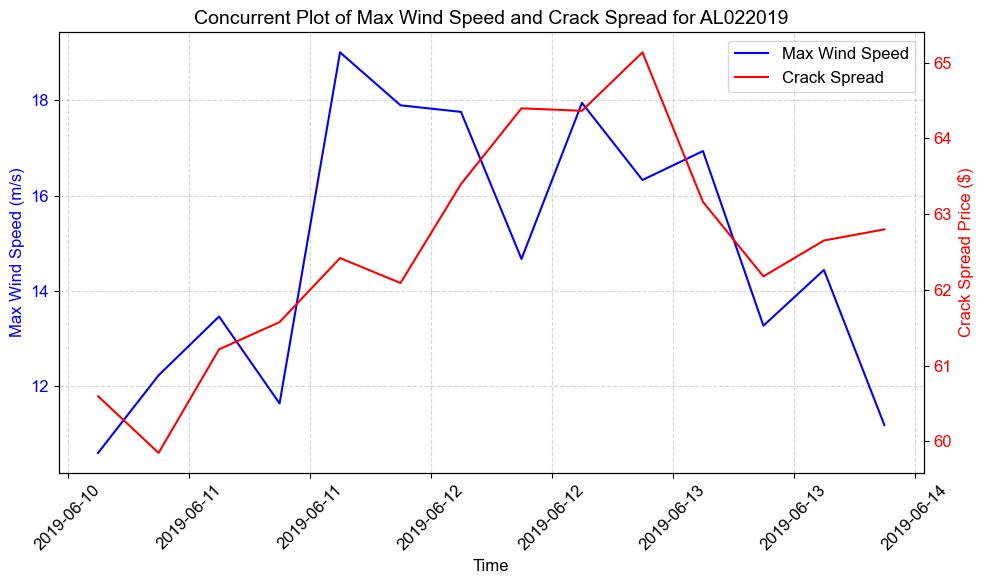

Phillips-Perron Test for AL022019 - Crack Spread Data
Test Statistic                 -1.184028
p-value                         0.913725
Lags Used                       0.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.884438
Critical Value (5%)            -3.822333
Critical Value (10%)           -3.359354
dtype: float64
Lagrange multiplier statistic: 0.04383935926214333
p-value: 0.8341527697216181
f-value: 0.037694629969371785
f p-value: 0.8493055050654612
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     4.914
Date:                Wed, 10 Apr 2024   Prob (F-statistic):             0.0467
Time:                        17:44:30   Log-Likelihood:                -22.227
No. Obs

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


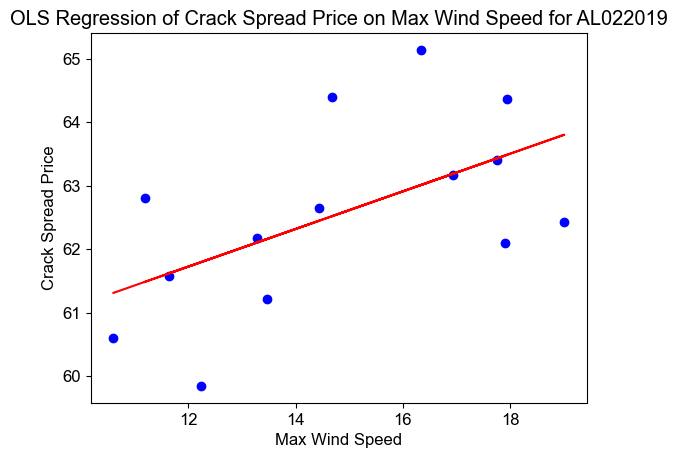

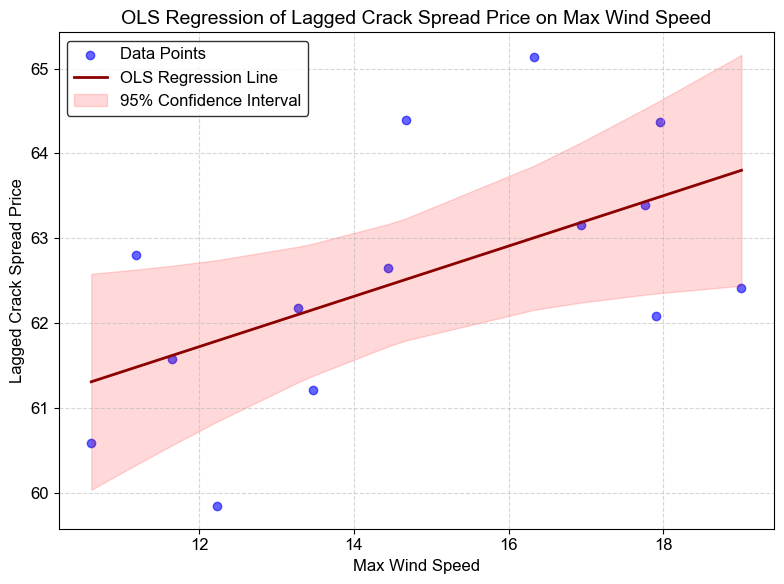

BD1: ['0', '4']
[0, 4]
[datetime.datetime(2020, 10, 4, 21, 0), datetime.datetime(2020, 10, 5, 3, 0), datetime.datetime(2020, 10, 5, 9, 0), datetime.datetime(2020, 10, 5, 15, 0), datetime.datetime(2020, 10, 5, 21, 0), datetime.datetime(2020, 10, 6, 3, 0), datetime.datetime(2020, 10, 6, 9, 0), datetime.datetime(2020, 10, 6, 15, 0), datetime.datetime(2020, 10, 6, 21, 0), datetime.datetime(2020, 10, 7, 3, 0), datetime.datetime(2020, 10, 7, 9, 0), datetime.datetime(2020, 10, 7, 15, 0), datetime.datetime(2020, 10, 7, 21, 0), datetime.datetime(2020, 10, 8, 3, 0), datetime.datetime(2020, 10, 8, 9, 0), datetime.datetime(2020, 10, 8, 15, 0), datetime.datetime(2020, 10, 8, 21, 0), datetime.datetime(2020, 10, 9, 3, 0), datetime.datetime(2020, 10, 9, 9, 0), datetime.datetime(2020, 10, 9, 15, 0), datetime.datetime(2020, 10, 9, 21, 0), datetime.datetime(2020, 10, 10, 3, 0), datetime.datetime(2020, 10, 10, 9, 0), datetime.datetime(2020, 10, 10, 15, 0)]


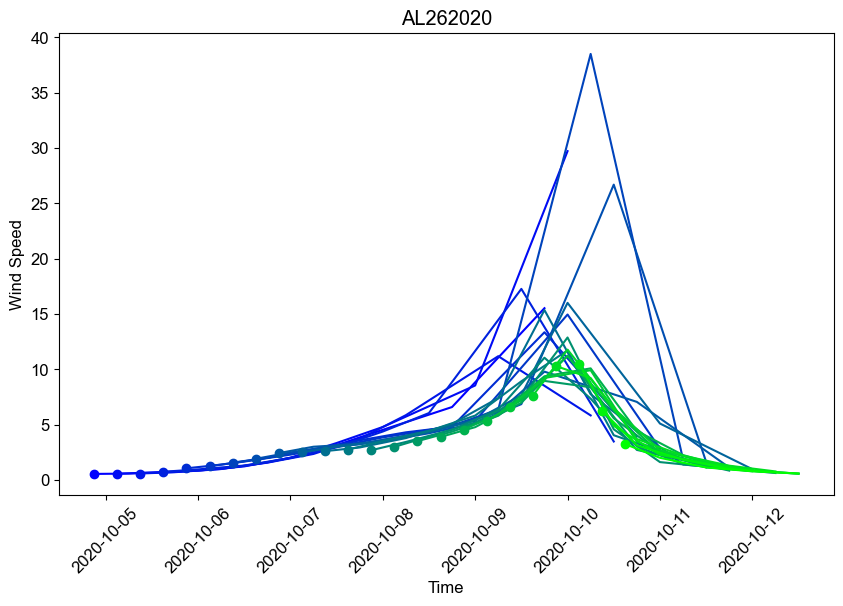

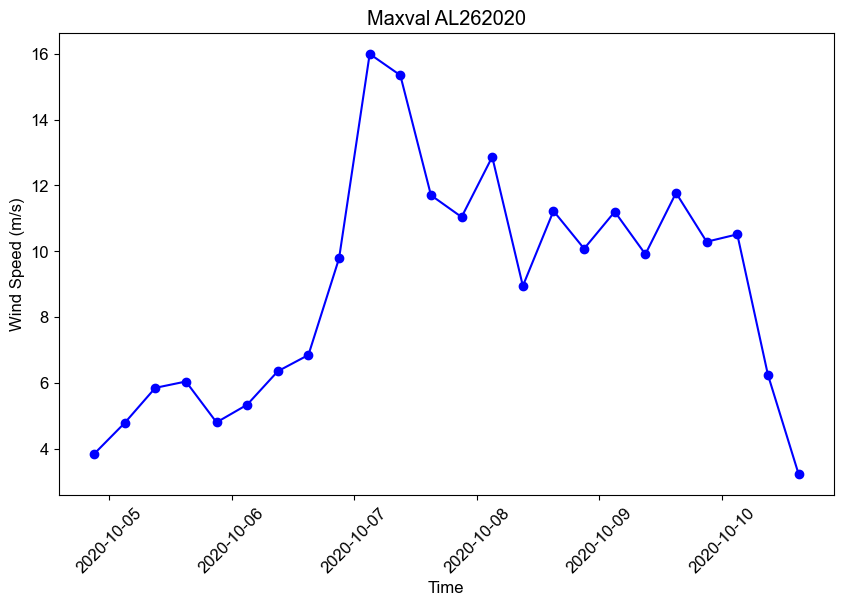

10
2020
2020-10-30 00:00:00


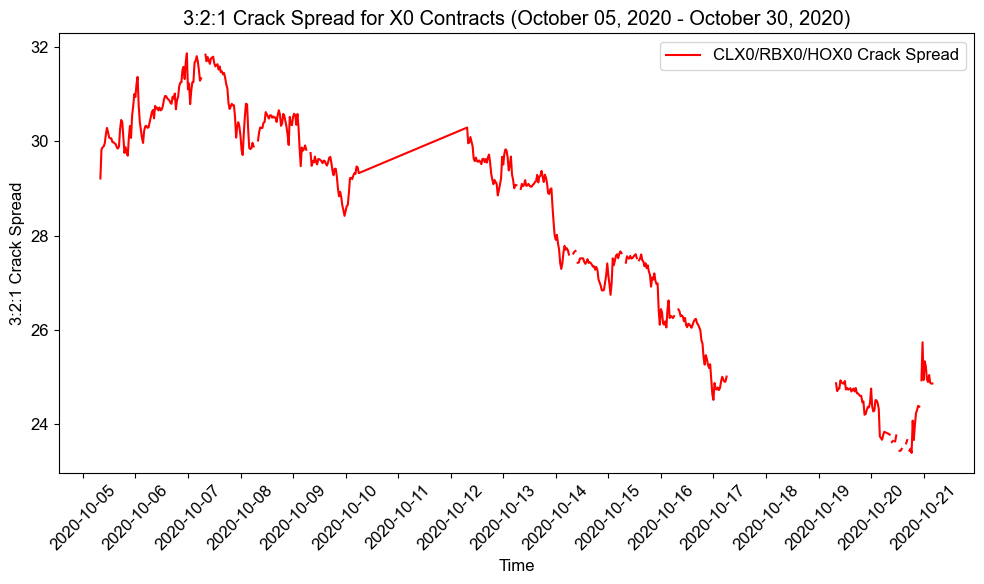

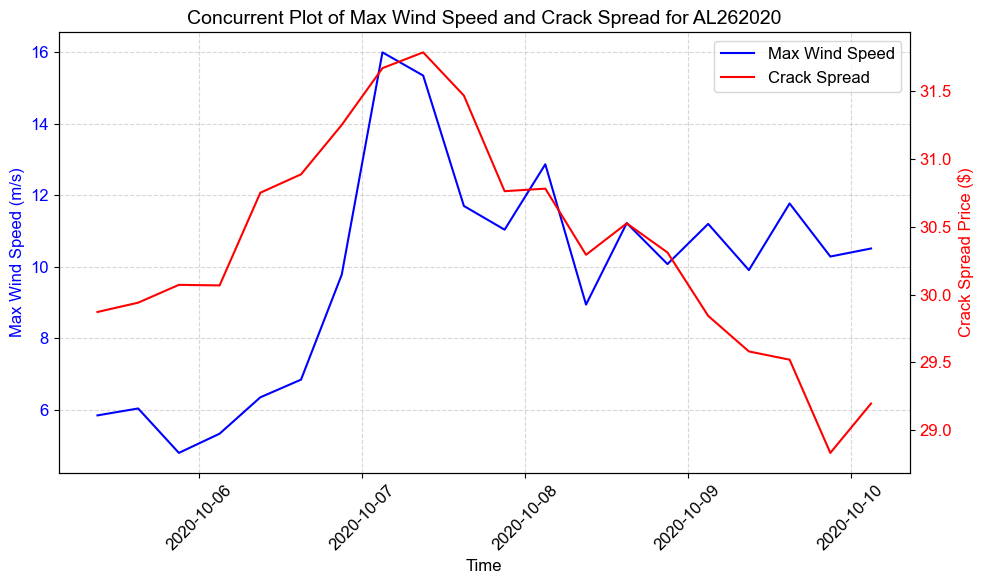

Phillips-Perron Test for AL262020 - Crack Spread Data
Test Statistic                 -2.264682
p-value                         0.453575
Lags Used                       5.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.799351
Critical Value (5%)            -3.786728
Critical Value (10%)           -3.339917
dtype: float64
Lagrange multiplier statistic: 1.1537197694249124
p-value: 0.2827718232929325
f-value: 1.1019127167576195
f p-value: 0.3077370653808252
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     4.025
Date:                Wed, 10 Apr 2024   Prob (F-statistic):             0.0601
Time:                        17:44:31   Log-Likelihood:                -21.834
No. Observ

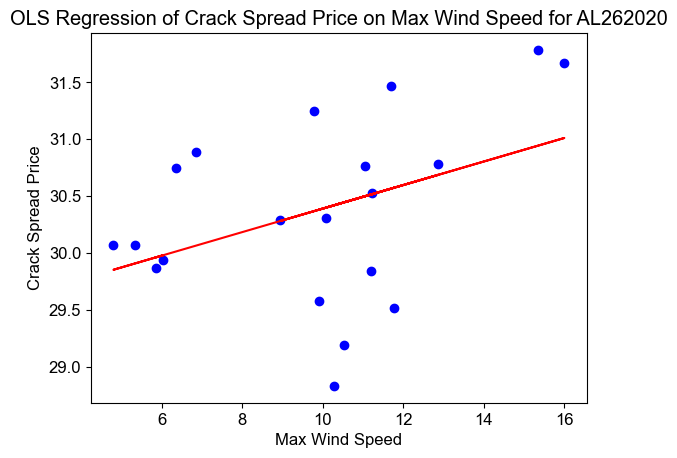

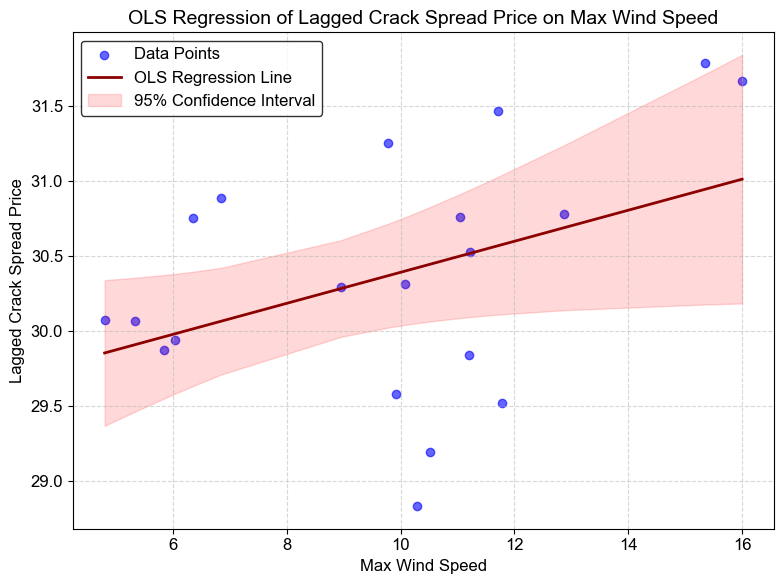

BD1: ['2', '4']
[2, 4]
[datetime.datetime(2020, 10, 24, 21, 0), datetime.datetime(2020, 10, 25, 3, 0), datetime.datetime(2020, 10, 25, 9, 0), datetime.datetime(2020, 10, 25, 15, 0), datetime.datetime(2020, 10, 25, 21, 0), datetime.datetime(2020, 10, 26, 3, 0), datetime.datetime(2020, 10, 26, 9, 0), datetime.datetime(2020, 10, 26, 15, 0), datetime.datetime(2020, 10, 26, 21, 0), datetime.datetime(2020, 10, 27, 3, 0), datetime.datetime(2020, 10, 27, 9, 0), datetime.datetime(2020, 10, 27, 15, 0), datetime.datetime(2020, 10, 27, 21, 0), datetime.datetime(2020, 10, 28, 3, 0), datetime.datetime(2020, 10, 28, 9, 0), datetime.datetime(2020, 10, 28, 15, 0), datetime.datetime(2020, 10, 28, 21, 0), datetime.datetime(2020, 10, 29, 3, 0), datetime.datetime(2020, 10, 29, 9, 0), datetime.datetime(2020, 10, 29, 15, 0), datetime.datetime(2020, 10, 29, 21, 0)]


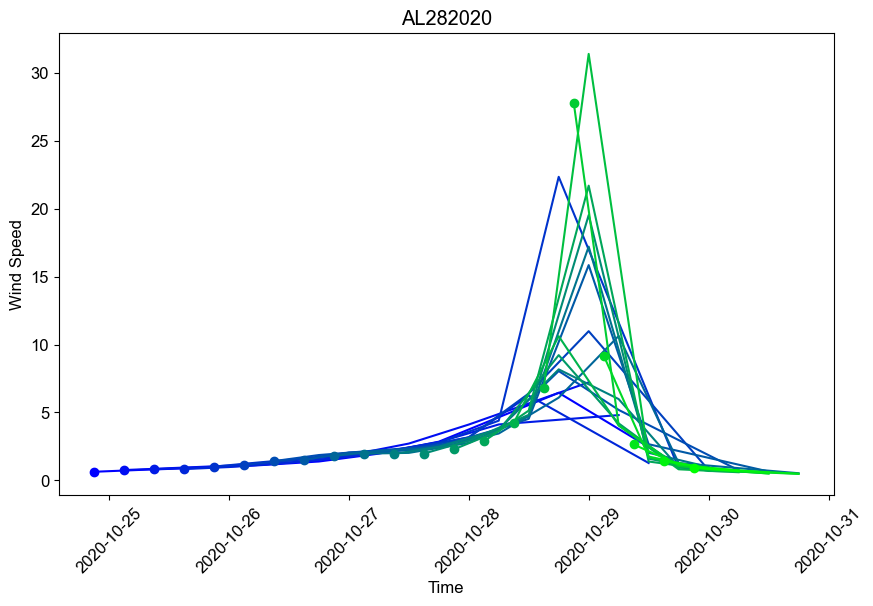

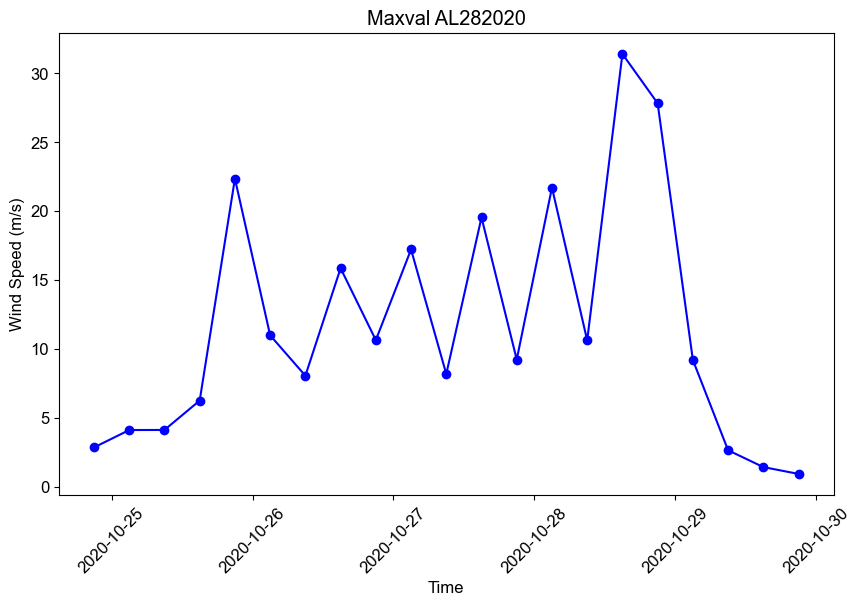

10
2020
2020-10-30 00:00:00


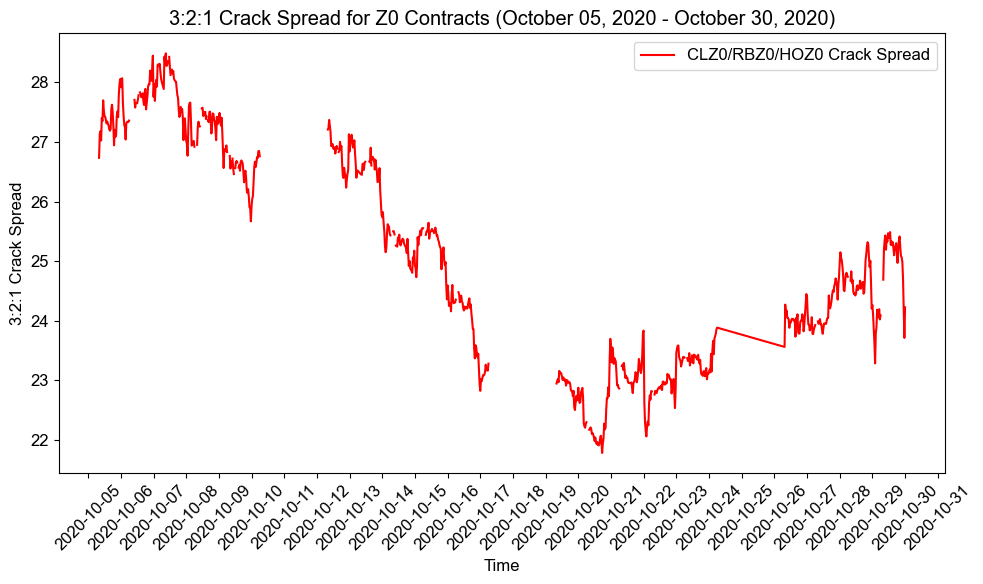

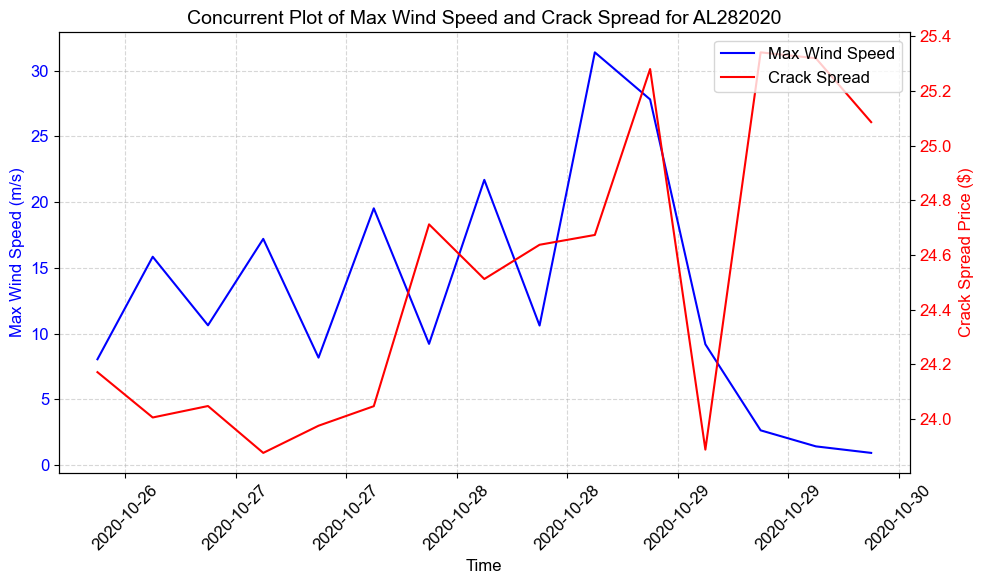

Phillips-Perron Test for AL282020 - Crack Spread Data
Test Statistic                -8.679469e+00
p-value                        1.944983e-12
Lags Used                      4.000000e+00
Number of Observations Used    1.000000e+01
Critical Value (1%)           -5.282515e+00
Critical Value (5%)           -3.985264e+00
Critical Value (10%)          -3.447240e+00
dtype: float64
Lagrange multiplier statistic: 0.012501319174571535
p-value: 0.9109746148211486
f-value: 0.010843513833122603
f p-value: 0.9186538400797724
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.1731
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.684
Time:                        17:44:32   Log-Likelihood:         

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


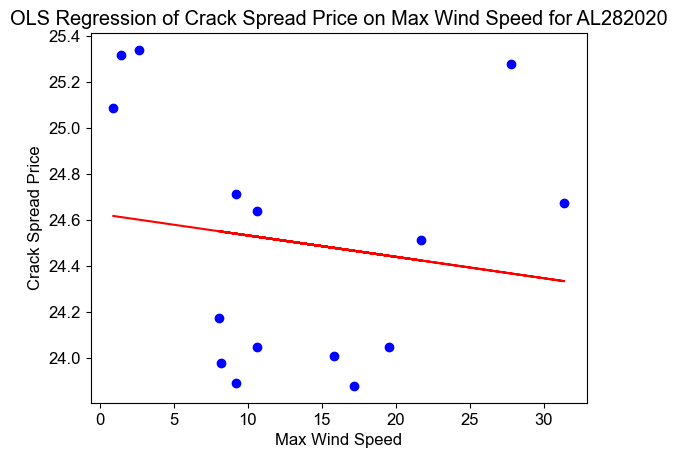

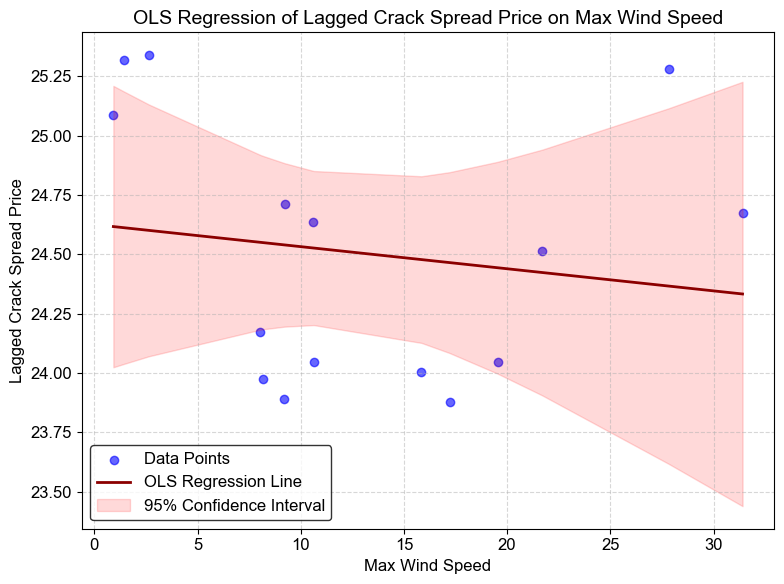

ADF Statistic: -7.275066
p-value: 0.000000
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     57.62
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           9.19e-13
Time:                        17:44:32   Log-Likelihood:                -288.21
No. Observations:                 220   AIC:                             580.4
Df Residuals:                     218   BIC:                             587.2
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------

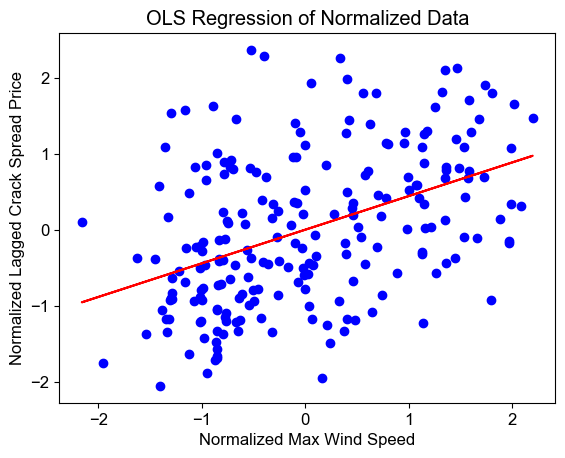

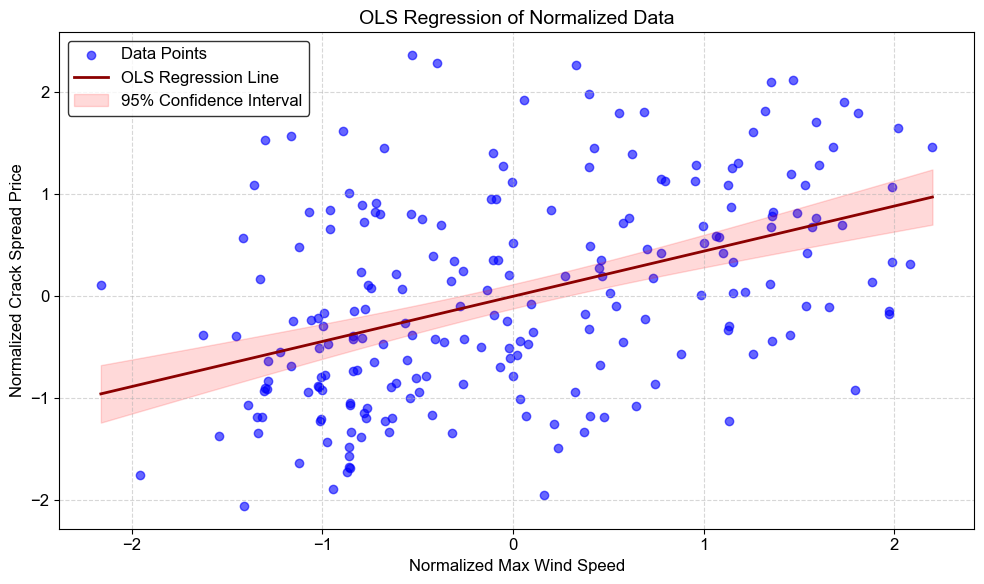

ADF Statistic: -17.071007
p-value: 0.000000
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574
OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     4.822
Date:                Wed, 10 Apr 2024   Prob (F-statistic):             0.0292
Time:                        17:44:32   Log-Likelihood:                -292.07
No. Observations:                 208   AIC:                             588.1
Df Residuals:                     206   BIC:                             594.8
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------

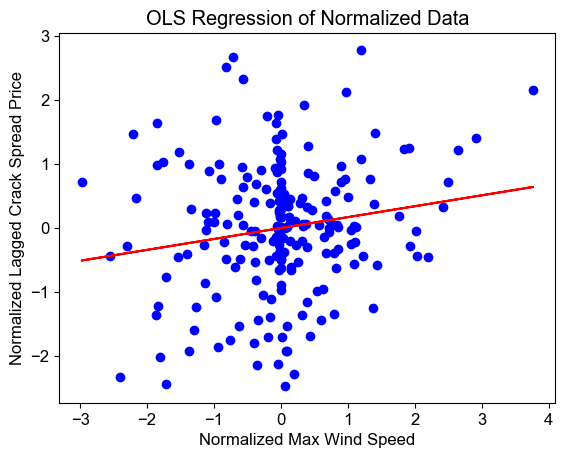

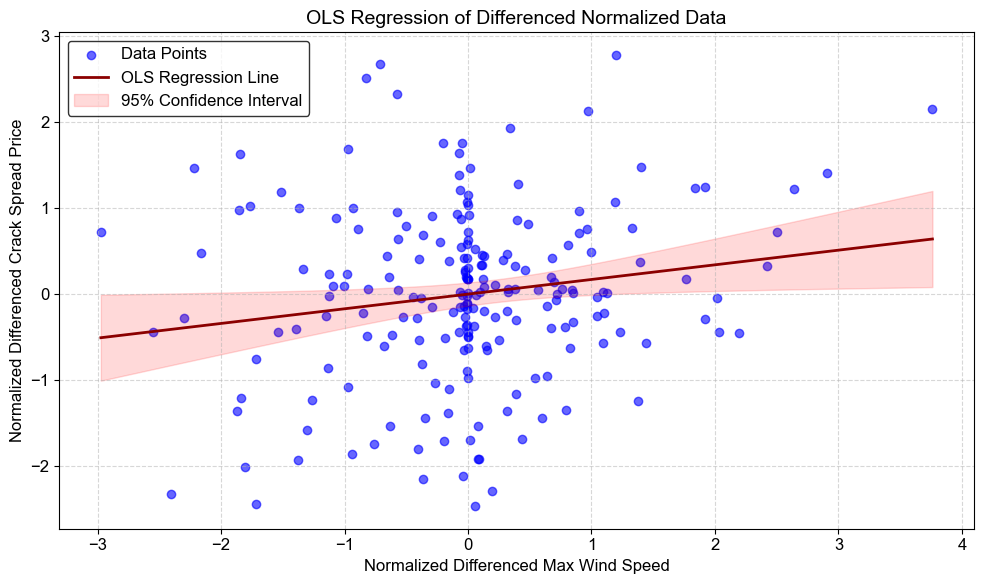

In [94]:
storm_lists = [
    ["AL092017", "AL132020", "AL192020", "AL222020", "AL142020", "AL032017"],
    ["AL092012", "AL162017", "AL032020", "AL022019", "AL262020", "AL282020"]
]


houston = np.array([29.7604, -95.3698]) # define the lat lon values for houston
galveston = ([29.3013, -94.7977]) # define the lat lon values for galveston
port_arthur = np.array([29.8850, -93.9399]) # define lat long values for port arthur
baton_rouge = ([30.4515, -91.1871]) # define lat long values for baton rouge
pca = ([0.80449481, -0.52853266, -0.2710006])
garyville = np.array([30.057346, -90.618488]) # define the lat lon values for garyville
midpoint = (port_arthur + garyville) / 2

center = np.array([30.111955893502792, -94.00019300317739])

cit = garyville

def phillips_perron_test(series):
    pp_test = sm.tsa.stattools.adfuller(series, regression='ct', autolag='AIC')
    pp_output = pd.Series(pp_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in pp_test[4].items():
        pp_output[f'Critical Value ({key})'] = value
    return pp_output


def wind(storm, city):

    ## extract the month from financial data, since it is not stored in the track data
    file_path = f'Intraday_data/{storm}.csv'
    data = pd.read_csv(file_path)
    
    date_string = data.iloc[1]['date']
    parsed_date = datetime.strptime(date_string, "%Y-%m-%d")
    storm_month = parsed_date.month # the storm's initial month
    storm_day = parsed_date.day # the storm's initial day
    storm_year = int(storm[-4:])

    with open(f"Data/{storm_year}data.pkl", 'rb') as f:
        x = pickle.load(f)

    # Initialize storm inception time
    inception_time_str = x[storm]['1']['INIT']['Time (UTC)']
    inception_day = int(inception_time_str[:2])
    inception_hour = 0 # updated later
    inception_time = datetime(storm_year, storm_month, inception_day, inception_hour)

    # set up the figure for each storm
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.title(f"{storm}")
    plt.xlabel("Time")
    plt.ylabel("Wind Speed")

    day_count = 0
    prev28 = 0
    prev29 = 0
    prev30 = 0
    prev31 = 0
    base_day = list(x[storm]['1']['INIT']['Time (UTC)'])[0:2]
    print("BD1:", base_day)
    base_day = [int(base_day[0]), int(base_day[1])]
    print(base_day)
    max_harr = []
    t_release = []

    # iterate through each discussion (forecast)
    for i, key in enumerate(x[storm].keys()):
        times = [] # temporary until I have final formula for the threat score
        wind_speeds = []
        lat_arr = []
        lon_arr = []
        hscore_arr = []
        datetimes = []  # Store datetime objects
        max_hs = 0

        # iterate through each line in a discussion
        for j, key2 in enumerate(x[storm][key].keys()):
        
            # print(key, key2) # for debugging

            # only add if storm is not dissipated
            if (x[storm][key][key2]['Dissipated?'] != True):

                # extract lat/lon strings
                lat = x[storm][key][key2]['Latitude']
                lon = x[storm][key][key2]['Longitude']
                ws_temp = x[storm][key][key2]['Wind Speed (KT)']   
                
                time_string = list(x[storm][key][key2]['Time (UTC)'])

                current_day = [int(time_string[0]), int(time_string[1])]
                add31 = 0

                # check if the date ever crosses the month border, and if it does, then store what the previous day was
                if ((current_day[0] - base_day[0])*10 + (current_day[1] - base_day[1])) < 0:
                    if prev_day == [3,1]:
                        prev31 = 1
                    elif prev_day == [3,0]:
                        prev30 = 1
                    elif prev_day == [2,9]:
                        prev29 = 1
                    elif prev_day == [2,8]:
                        prev28 = 1
                    
                    # calculating the total number of hours past the initial date
                    adds = prev28 * 28 + prev29 * 29 + prev30 * 30 + prev31 * 31
                    day_hrs = ((current_day[0] - base_day[0])*10 + (current_day[1] - base_day[1]) + adds)* 24
                    hour = int(time_string[3]) * 10 + int(time_string[4]) + day_hrs
    
                    # Extract time and convert to datetime
                    current_datetime = inception_time + timedelta(hours=hour)
                    times.append(current_datetime)

                # if the date doesn't cross a month border, continue as usual
                else:
                    day_hrs = ((current_day[0] - base_day[0])*10 + (current_day[1] - base_day[1]))* 24
                    hour = int(time_string[3]) * 10 + int(time_string[4]) + day_hrs

                    # Extract time and convert to datetime
                    current_datetime = inception_time + timedelta(hours=hour)
                    times.append(current_datetime)
            
                # append the wind speed in knots to the wind speed array
                wind_speeds.append(int(ws_temp))

                # get the location of the storm
                if (lat[-1] == "N"):
                    lat_arr.append(float(lat[0:-1]))
                elif (lat[-1] == "S"):
                    lat_arr.append(-float(lat[0:-1]))
                if (lon[-1] == "E"):
                    lon_arr.append(float(lon[0:-1]))
                elif (lon[-1] == "W"):
                    lon_arr.append(-float(lon[0:-1]))

                # # define the storm that we are interested in analyzing [now defined in function]
                # city = port_arthur

                # # calculate distance from city to the storm
                # dist1 = distance(garyville, np.array([lat_arr[-1], lon_arr[-1]])) #
                # # calculate distance from city to the storm
                # dist2 = distance(port_arthur, np.array([lat_arr[-1], lon_arr[-1]])) #
                # # calculate distance from city to the storm
                # dist3 = distance(center, np.array([lat_arr[-1], lon_arr[-1]])) #
                # # calculate distance from city to the storm
                # dist = np.min(np.array([dist1, dist2, dist3]))

                # calculate distance from city to the storm
                dist = distance(city, np.array([lat_arr[-1], lon_arr[-1]]))


                windspeed_ms = int(ws_temp) * 0.5144

                # append the wind speed in the city to the forecast's array, based on the equations of the wind field model from above: distance in km, windspeed_ms in m/s, r_max in km?
                hscore_arr.append(wind_speed(dist, windspeed_ms, calc_rmax(windspeed_ms, lat_arr[-1])))

                horizons = ['INIT', '12H', '24H', '36H', '48H', '60H', '72H', '96H', '120H']
                horizons = ['INIT', '12H', '24H', '36H', '48H', '60H', '72H']

                # store the max wind speed in a given forecast ONLY IF IT IS OF A PARTICULAR HORIZON
                if ((hscore_arr[-1] > max_hs) & (x[storm][key][key2]['TOut'] in horizons)):
                    max_hs = hscore_arr[-1]


                # go to the next day
                prev_day = current_day
        
        # append the max wind speed after each forecast
        max_harr.append(max_hs)

        # append the initial release time for each forecast
        t_release.append(times[0])
    
        
        # Create a custom colormap using ListedColormap
        colors = ["blue", "green", "yellow", "red"]
        custom_colormap = mcolors.ListedColormap(colors)

        # Create a custom colormap using LinearSegmentedColormap
        cmap_name = "my_colormap"
        colors = [(0, 0, 1), (0, 1, 0)]  # RGB for Light Green and Light Blue
        n_bins = len(x[storm])  # Number of bins
        custom_linear_colormap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

        color = custom_linear_colormap(i / len(x[storm]))


        # plotting the forecasts
        ax.plot(times[0], hscore_arr[0], marker = "o", color = color)
        ax.plot(times, hscore_arr, color=color, label = key)    
        

    print(t_release)
    plt.xticks(rotation=45) 
    plt.show()

    
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    plt.title(f"Maxval {storm}")
    plt.xlabel("Time")
    plt.ylabel("Wind Speed (m/s)")
    ax2.plot(t_release, max_harr, marker = "o", color='blue')


    # Rotate x-axis labels
    plt.xticks(rotation=45)

    plt.show()

    return t_release, max_harr

def crack(storm):

    file_path = f'Intraday_data/{storm}.csv'
    data = pd.read_csv(file_path)

    # Beginning of the Data
    date_string = data.iloc[1]['date']
    parsed_date = datetime.strptime(date_string, "%Y-%m-%d")
    storm_month = parsed_date.month # the storm's initial month
    storm_day = parsed_date.day # the storm's initial day
    storm_year = int(storm[-4:])
    print(storm_month)
    print(storm_year)

    # Convert date and time to a datetime format
    data['datetime'] = pd.to_datetime(data['date']) + timedelta(hours=13.5) + pd.to_timedelta(data['time'], unit='min') 

    # Convert HO and RB prices to per barrel
    data.loc[data['sym'].str.contains('HO') | data['sym'].str.contains('RB'), ['bid', 'ask', 'prc']] *= 42

    contract = data.iloc[-1]['sym'][2:]


    if (storm == 'AL132020') | (storm == 'AL142020'):
        contract = 'V0'

    if storm == 'AL032017':
        contract = 'Q7'

    if storm == 'AL022019':
        contract = 'N9'

    if (storm == 'AL032020'):
        contract = 'N0'
    if (storm == 'AL082020'):
        contract = 'Q0'

    if (storm == 'AL192020'):
        contract = 'V0'

    if (storm == 'AL262020'):
        contract = 'X0'
        
    if (storm == 'AL282020'):
        contract = 'Z0'

    if (storm == 'AL162017'):
        contract = 'X7'

    if (storm == 'AL092012'):
        contract = 'V2'
        
    if (storm == 'AL042012'):
        contract = 'Q2'
 
 
    ho = f'HO{contract}'
    rb = f'RB{contract}'
    cl = f'CL{contract}'

    
    date_final = data.iloc[-1]['date']
    parsed_date_final = datetime.strptime(date_final, "%Y-%m-%d")
    print(parsed_date_final)
    final_month = parsed_date_final.month # the storm's initial month
    final_day = parsed_date_final.day # the storm's initial day
    final_year = parsed_date_final.year

    storm_year = int(storm[-4:])

    
    # Filter data for the desired date range and specific contracts
    start_date = datetime(storm_year, storm_month, storm_day)
    end_date = datetime(final_year,final_month, final_day)
    filtered_data = data[(data['datetime'] >= start_date) & (data['datetime'] <= end_date)]
    filtered_data = filtered_data[filtered_data['sym'].isin([cl, rb, ho])]
        

    # Pivot the data for easier calculation
    pivoted_data = filtered_data.pivot_table(index='datetime', columns='sym', values='prc')

    # Calculate the 3:2:1 crack spreads
    pivoted_data['321crack_spread'] = -1* ( 3 * pivoted_data[cl] - 2 * pivoted_data[rb] - pivoted_data[ho])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(pivoted_data.index, pivoted_data['321crack_spread'], label=f'{cl}/{rb}/{ho} Crack Spread', color = 'red')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.xticks(rotation=45)
    plt.xlabel('Time')
    plt.ylabel('3:2:1 Crack Spread')
    plt.title(f'3:2:1 Crack Spread for {contract} Contracts ({start_date.strftime("%B %d, %Y")} - {end_date.strftime("%B %d, %Y")})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return pivoted_data

time_difference_threshold = 31  # 30 minutes, for example

X_big = []
Y_big = []

X_big_diff = []
Y_big_diff = []

for i, storms in enumerate(storm_lists):
    if i == 0:
        cit = center
    else:
        cit = garyville


    # iterate through each storm in the 'storms' list above. This will be the loop that sets up the X and Y data for the regression
    for storm in storms:

        t_release, max_harr = wind(storm, cit) ################################################################################ define city
        
        # Phase 2: Processing the Crack Spread Data
        
        pivoted_data = crack(storm)

        # Phase 3: Plotting

        # Convert t_release to pandas datetime for better plotting and aligning
        t_release_datetime = pd.to_datetime(t_release)

        # Convert pivoted_data index to the same format as t_release for KDTree
        pivoted_data_seconds = pivoted_data.index.map(lambda x: x.timestamp())
        t_release_seconds = t_release_datetime.map(lambda x: x.timestamp()).values.reshape(-1, 1)

        # Create KDTree and find the nearest dates in pivoted_data for each date in t_release
        tree = KDTree(pivoted_data_seconds.values.reshape(-1, 1))
        distances, indices = tree.query(t_release_seconds)

        # Filter out indices where the distance is more than the threshold
        valid_indices = distances < time_difference_threshold
        aligned_t_release = t_release_datetime[valid_indices]
        aligned_max_harr = np.array(max_harr)[valid_indices]

        # Align crack spread values with filtered t_release dates
        aligned_crack_spreads = pivoted_data['321crack_spread'].iloc[indices][valid_indices].values

        plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

        # Create the figure and the first axis for max wind speed
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Max Wind Speed plot (ax1)
        color = 'blue'
        ax1.set_xlabel('Time', fontsize=12)
        ax1.set_ylabel('Max Wind Speed (m/s)', color=color, fontsize=12)
        ax1.plot(aligned_t_release, aligned_max_harr, color=color, label='Max Wind Speed')
        ax1.tick_params(axis='y', labelcolor=color)

        # Setting up the x-axis for dates
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.xticks(rotation=45)

        # Create the second axis for crack spread
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        # Crack Spread plot (ax2)
        color = 'red'
        ax2.set_ylabel('Crack Spread Price ($)', color=color, fontsize=12)
        ax2.plot(aligned_t_release, aligned_crack_spreads, color=color, label='Crack Spread')
        ax2.tick_params(axis='y', labelcolor=color)

        # Add grid and legend
        ax1.grid(True, linestyle='--', alpha=0.5)
        fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

        # Title and layout
        plt.title(f'Concurrent Plot of Max Wind Speed and Crack Spread for {storm}', fontsize=14)
        fig.tight_layout()
        plt.show()

        # Phase 4: Regression


        # Assuming 't_release' contains the timestamps and 'max_harr' contains the wind speeds
        wind_speed_data = pd.DataFrame({
            'datetime': pd.Series(t_release),
            'max_harr': max_harr
        })

        # Filter out rows where max_harr is below a threshold [ do not need anymore ]
        filtered_wind_speed_data = wind_speed_data[wind_speed_data['max_harr'] >= 0]

        # Convert the timestamps in filtered_wind_speed_data and pivoted_data to a common format (seconds since the Unix epoch)
        time_format = lambda x: (x - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
        filtered_wind_speed_data['datetime'] = filtered_wind_speed_data['datetime'].apply(time_format)

        # Prepare the crack spread data
        pivoted_data_reset = pivoted_data.reset_index()
        pivoted_data_seconds = pd.DataFrame({
            'datetime': pivoted_data_reset['datetime'].map(time_format),
            '321crack_spread': pivoted_data_reset['321crack_spread']
        })

        # Merge based on the exact timestamp match
        merged_data = pd.merge(filtered_wind_speed_data,
                            pivoted_data_seconds,
                            on='datetime',
                            how='inner')

        # The result is a DataFrame with aligned wind speed and crack spread data
        aligned_wind_speed = merged_data['max_harr']
        aligned_crack_spread = merged_data['321crack_spread']


        # Extracting the aligned wind speed data
        aligned_max_harr = merged_data['max_harr'].values


        # OLS

        # Define the lag in minutes
        lag_minutes = 0  # For example, a 30-minute lag
        pivoted_data.index = pd.to_datetime(pivoted_data.index)
        # Shift the crack spread data by the specified lag
        pivoted_data['lagged_crack_spread'] = pivoted_data['321crack_spread'].shift(periods=-lag_minutes, freq='T')

        # Convert t_release to pandas datetime for better plotting and aligning
        t_release_datetime = pd.to_datetime(t_release)

        # Convert pivoted_data index to the same format as t_release for KDTree
        pivoted_data_seconds = pivoted_data.index.map(lambda x: x.timestamp())
        t_release_seconds = t_release_datetime.map(lambda x: x.timestamp()).values.reshape(-1, 1)

        # Create KDTree and find the nearest dates in pivoted_data for each date in t_release
        tree = KDTree(pivoted_data_seconds.values.reshape(-1, 1))
        distances, indices = tree.query(t_release_seconds)

        # Filter out indices where the distance is more than the threshold
        valid_indices = distances < time_difference_threshold
        aligned_t_release = t_release_datetime[valid_indices]

        # Align lagged crack spread values with the filtered t_release dates
        aligned_lagged_crack_spreads = pivoted_data['lagged_crack_spread'].iloc[indices][valid_indices].values


        # Align lagged crack spread values with the filtered t_release dates
        aligned_lagged_crack_spreads = pivoted_data['lagged_crack_spread'].iloc[indices][valid_indices].values

        # Ensure that we drop NaN values which might have been introduced by the shift
        mask = ~np.isnan(aligned_lagged_crack_spreads)
        final_aligned_max_harr = aligned_max_harr[mask]
        final_aligned_lagged_crack_spreads = aligned_lagged_crack_spreads[mask]

        # Prepare the data for regression
        X = final_aligned_max_harr.reshape(-1, 1)
        y = final_aligned_lagged_crack_spreads

        xtemp = ((X - np.mean(X))/np.std(X))
        ytemp = ((y - np.mean(y))/np.std(y))

        X_big.extend(xtemp.flatten())
        Y_big.extend(ytemp.flatten())

        # for differenced regression
        X_diff = np.diff(X, axis=0).reshape(-1, 1)  # First difference of X
        y_diff = np.diff(y, axis=0)  # First difference of y
        # Normalize the differenced data
        xtemp_diff = ((X_diff - np.mean(X_diff)) / np.std(X_diff))
        ytemp_diff = ((y_diff - np.mean(y_diff)) / np.std(y_diff))

        X_big_diff.extend(xtemp_diff.flatten())
        Y_big_diff.extend(ytemp_diff.flatten())


        # Add a constant to the model for the intercept
        X_with_constant = sm.add_constant(X)

        # Build and fit the OLS model
        ols_model = sm.OLS(y, X_with_constant)
        # ols_model = sm.QuantReg(y, X_with_constant)
        ols_results = ols_model.fit(cov_type='HC3')


        # Breusch-Pagan
        residuals = ols_results.resid
        fitted_vals = ols_results.fittedvalues
        bp_test = het_breuschpagan(residuals, ols_results.model.exog)

        # Phillips-Perron Test on Crack Spread Data
        print(f"Phillips-Perron Test for {storm} - Crack Spread Data")
        pp_results = phillips_perron_test(y)
        print(pp_results)

        # Output the test statistics
        labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
        for name, value in zip(labels, bp_test):
            print(f"{name}: {value}")


        # Print the summary statistics
        # print("OLS Regression Results with Lagged Crack Spread:")
        print("OLS Regression Results:")

        print(ols_results.summary())

        # Plotting the results
        plt.scatter(X, y, color='blue')
        plt.plot(X, ols_results.predict(X_with_constant), color='red')
        plt.xlabel('Max Wind Speed')
        plt.ylabel('Crack Spread Price')
        plt.title(f'OLS Regression of Crack Spread Price on Max Wind Speed for {storm}')
        plt.show()

        # Generate predictions and the confidence interval
        predictions = ols_results.get_prediction(X_with_constant)
        predictions_summary_frame = predictions.summary_frame()
        predicted_mean = predictions_summary_frame['mean']
        predicted_mean_ci_lower = predictions_summary_frame['mean_ci_lower']
        predicted_mean_ci_upper = predictions_summary_frame['mean_ci_upper']

        # Convert to numpy arrays and handle potential NaNs
        predicted_mean_np = np.array(predicted_mean).flatten()
        predicted_mean_ci_lower_np = np.array(predicted_mean_ci_lower).flatten()
        predicted_mean_ci_upper_np = np.array(predicted_mean_ci_upper).flatten()

        # Sort the data by X values (if not already sorted)
        sorted_idx = np.argsort(X.flatten())
        X_sorted = X.flatten()[sorted_idx]

        # Sorting the confidence intervals accordingly
        predicted_mean_ci_lower_sorted = predicted_mean_ci_lower_np[sorted_idx]
        predicted_mean_ci_upper_sorted = predicted_mean_ci_upper_np[sorted_idx]

        # Professional Plotting for Academic Paper
        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
        plt.plot(X_sorted, predicted_mean_np[sorted_idx], color='darkred', label='OLS Regression Line', lw=2)

        # Plotting the confidence interval with proper sorting and visible shading
        plt.fill_between(X_sorted, predicted_mean_ci_lower_sorted, predicted_mean_ci_upper_sorted, color='red', alpha=0.15, label='95% Confidence Interval')

        plt.xlabel('Max Wind Speed', fontsize=12)
        plt.ylabel('Lagged Crack Spread Price', fontsize=12)
        plt.title(f'OLS Regression of Lagged Crack Spread Price on Max Wind Speed', fontsize=14)
        plt.legend(frameon=True, edgecolor='black')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()

        plt.show()


#### Total Normal Regression ####

# Convert lists to numpy arrays
X_big_np = np.array(X_big).reshape(-1, 1)
Y_big_np = np.array(Y_big)

# Perform Augmented Dickey-Fuller test
result = adfuller(Y_big_np)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Add a constant to the model for the intercept
X_with_constant = sm.add_constant(X_big_np)

# Build and fit the OLS model
ols_model = sm.OLS(Y_big_np, X_with_constant)
ols_results = ols_model.fit(cov_type='HC3')

# Print the summary statistics
print("OLS Regression Results:")
print(ols_results.summary())

# Plotting the results
plt.scatter(X_big_np, Y_big_np, color='blue')
plt.plot(X_big_np, ols_results.predict(X_with_constant), color='red')
plt.xlabel('Normalized Max Wind Speed')
plt.ylabel('Normalized Lagged Crack Spread Price')
plt.title('OLS Regression of Normalized Data')
plt.show()


# Generate predictions and the confidence interval
predictions = ols_results.get_prediction(X_with_constant)
predictions_summary_frame = predictions.summary_frame()
predicted_mean = predictions_summary_frame['mean']
predicted_mean_ci_lower = predictions_summary_frame['mean_ci_lower']
predicted_mean_ci_upper = predictions_summary_frame['mean_ci_upper']

# Convert to numpy arrays and handle potential NaNs
predicted_mean_np = np.array(predicted_mean).flatten()
predicted_mean_ci_lower_np = np.array(predicted_mean_ci_lower).flatten()
predicted_mean_ci_upper_np = np.array(predicted_mean_ci_upper).flatten()

# Sort the data by X values (if not already sorted)
sorted_idx = np.argsort(X_big_np.flatten())
X_sorted = X_big_np.flatten()[sorted_idx]

# Sorting the confidence intervals accordingly
predicted_mean_ci_lower_sorted = predicted_mean_ci_lower_np[sorted_idx]
predicted_mean_ci_upper_sorted = predicted_mean_ci_upper_np[sorted_idx]

# Professional Plotting for Academic Paper
plt.figure(figsize=(10, 6))
plt.scatter(X_big_np, Y_big_np, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_sorted, predicted_mean_np[sorted_idx], color='darkred', label='OLS Regression Line', lw=2)

# Plotting the confidence interval with proper sorting and visible shading
plt.fill_between(X_sorted, predicted_mean_ci_lower_sorted, predicted_mean_ci_upper_sorted, color='red', alpha=0.15, label='95% Confidence Interval')

plt.xlabel('Normalized Max Wind Speed', fontsize=12)
plt.ylabel('Normalized Crack Spread Price', fontsize=12)
plt.title(f'OLS Regression of Normalized Data', fontsize=14)
plt.legend(frameon=True, edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()







#### Differenced Total ####

# Convert lists to numpy arrays
X_big_diff_total = np.array(X_big_diff).reshape(-1, 1)
Y_big_diff_total = np.array(Y_big_diff)

# Perform Augmented Dickey-Fuller test
result = adfuller(Y_big_diff_total)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Add a constant to the model for the intercept
X_with_constant = sm.add_constant(X_big_diff_total)

# Build and fit the OLS model
ols_model = sm.OLS(Y_big_diff_total, X_with_constant)
ols_results = ols_model.fit(cov_type='HC3')

# Print the summary statistics
print("OLS Regression Results:")
print(ols_results.summary())

# Plotting the results
plt.scatter(X_big_diff_total, Y_big_diff_total, color='blue')
plt.plot(X_big_diff_total, ols_results.predict(X_with_constant), color='red')
plt.xlabel('Normalized Max Wind Speed')
plt.ylabel('Normalized Lagged Crack Spread Price')
plt.title('OLS Regression of Normalized Data')
plt.show()


# Generate predictions and the confidence interval
predictions = ols_results.get_prediction(X_with_constant)
predictions_summary_frame = predictions.summary_frame()
predicted_mean = predictions_summary_frame['mean']
predicted_mean_ci_lower = predictions_summary_frame['mean_ci_lower']
predicted_mean_ci_upper = predictions_summary_frame['mean_ci_upper']

# Convert to numpy arrays and handle potential NaNs
predicted_mean_np = np.array(predicted_mean).flatten()
predicted_mean_ci_lower_np = np.array(predicted_mean_ci_lower).flatten()
predicted_mean_ci_upper_np = np.array(predicted_mean_ci_upper).flatten()

# Sort the data by X values (if not already sorted)
sorted_idx = np.argsort(X_big_diff_total.flatten())
X_sorted = X_big_diff_total.flatten()[sorted_idx]

# Sorting the confidence intervals accordingly
predicted_mean_ci_lower_sorted = predicted_mean_ci_lower_np[sorted_idx]
predicted_mean_ci_upper_sorted = predicted_mean_ci_upper_np[sorted_idx]

# Professional Plotting for Academic Paper
plt.figure(figsize=(10, 6))
plt.scatter(X_big_diff_total, Y_big_diff_total, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_sorted, predicted_mean_np[sorted_idx], color='darkred', label='OLS Regression Line', lw=2)

# Plotting the confidence interval with proper sorting and visible shading
plt.fill_between(X_sorted, predicted_mean_ci_lower_sorted, predicted_mean_ci_upper_sorted, color='red', alpha=0.15, label='95% Confidence Interval')

plt.xlabel('Normalized Differenced Max Wind Speed', fontsize=12)
plt.ylabel('Normalized Differenced Crack Spread Price', fontsize=12)
plt.title(f'OLS Regression of Differenced Normalized Data', fontsize=14)
plt.legend(frameon=True, edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()








